


# Importing the libraries and load the dataset

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
df = pd.read_csv(r"D:\New folder\SriLanka_Weather_Dataset.csv", encoding='utf-8')
df.head()

time  weathercode  temperature_2m_max  temperature_2m_min  \
0  2010-01-01            2                30.0                22.7   
1  2010-01-02           51                29.9                23.5   
2  2010-01-03           51                29.5                23.2   
3  2010-01-04            2                28.9                21.9   
4  2010-01-05            1                28.1                21.3   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0                 26.1                      34.4                      25.2   
1                 26.2                      33.8                      26.2   
2                 26.0                      34.3                      26.3   
3                 25.3                      31.6                      23.4   
4                 24.5                      30.1                      23.1   

   apparent_temperature_mean           sunrise            sunset  ...  \
0                       29.2  2010-01-01T00:52  2010-01-01T12:35  ...   
1                       29.8  2010-01-02T00:52  2010-01-02T12:36  ...   
2                       29.9  2010-01-03T00:53  2010-01-03T12:36  ...   
3                       27.8  2010-01-04T00:53  2010-01-04T12:37  ...   
4                       26.1  2010-01-05T00:53  2010-01-05T12:37  ...   

   precipitation_hours  windspeed_10m_max  windgusts_10m_max  \
0                  0.0               11.7               27.4   
1                  1.0               13.0               27.0   
2                  3.0               12.3               27.4   
3                  0.0               17.0               34.6   
4                  0.0               18.7               37.1   

   winddirection_10m_dominant  et0_fao_evapotranspiration  latitude  \
0                          20                        4.58       7.0   
1                          24                        3.84       7.0   
2                          16                        3.65       7.0   
3                         356                        3.79       7.0   
4                         355                        4.97       7.0   

   longitude  elevation    country     city  
0  79.899994       16.0  Sri Lanka  Colombo  
1  79.899994       16.0  Sri Lanka  Colombo  
2  79.899994       16.0  Sri Lanka  Colombo  
3  79.899994       16.0  Sri Lanka  Colombo  
4  79.899994       16.0  Sri Lanka  Colombo  

[5 rows x 24 columns]

In [10]:
df.dtypes

time                           object
weathercode                     int64
temperature_2m_max            float64
temperature_2m_min            float64
temperature_2m_mean           float64
apparent_temperature_max      float64
apparent_temperature_min      float64
apparent_temperature_mean     float64
sunrise                        object
sunset                         object
shortwave_radiation_sum       float64
precipitation_sum             float64
rain_sum                      float64
snowfall_sum                  float64
precipitation_hours           float64
windspeed_10m_max             float64
windgusts_10m_max             float64
winddirection_10m_dominant      int64
et0_fao_evapotranspiration    float64
latitude                      float64
longitude                     float64
elevation                     float64
country                        object
city                           object
dtype: object

In [11]:
df.describe()

weathercode  temperature_2m_max  temperature_2m_min  \
count  147480.000000       147480.000000       147480.000000   
mean       46.647776           29.242367           23.899913   
std        21.623876            2.120345            2.059291   
min         0.000000           17.500000           12.100000   
25%        51.000000           28.200000           23.100000   
50%        53.000000           29.200000           24.300000   
75%        61.000000           30.400000           25.200000   
max        65.000000           37.500000           30.000000   

       temperature_2m_mean  apparent_temperature_max  \
count        147480.000000             147480.000000   
mean             26.225590                 34.112355   
std               1.842147                  2.966144   
min              16.300000                 18.500000   
25%              25.600000                 32.400000   
50%              26.400000                 34.200000   
75%              27.200000                 36.100000   
max              31.800000                 43.400000   

       apparent_temperature_min  apparent_temperature_mean  \
count             147480.000000              147480.000000   
mean                  27.711096                  30.317066   
std                    2.835051                   2.540275   
min                   10.500000                  16.300000   
25%                   26.400000                  29.200000   
50%                   28.400000                  30.800000   
75%                   29.600000                  31.900000   
max                   34.700000                  37.400000   

       shortwave_radiation_sum  precipitation_sum       rain_sum  \
count            147480.000000      147480.000000  147480.000000   
mean                 18.483513           5.975637       5.975637   
std                   4.214270          10.215294      10.215294   
min                   1.230000           0.000000       0.000000   
25%                  16.220000           0.400000       0.400000   
50%                  19.130000           2.600000       2.600000   
75%                  21.510000           7.500000       7.500000   
max                  28.980000         338.800000     338.800000   

       snowfall_sum  precipitation_hours  windspeed_10m_max  \
count      147480.0        147480.000000      147480.000000   
mean            0.0             8.762524          15.561288   
std             0.0             7.191010           6.213737   
min             0.0             0.000000           2.200000   
25%             0.0             2.000000          11.000000   
50%             0.0             8.000000          15.000000   
75%             0.0            14.000000          18.900000   
max             0.0            24.000000          50.200000   

       windgusts_10m_max  winddirection_10m_dominant  \
count      147480.000000               147480.000000   
mean           34.796932                  182.881625   
std            10.214372                   93.670247   
min            11.500000                    0.000000   
25%            26.600000                   88.000000   
50%            33.100000                  215.000000   
75%            41.800000                  249.000000   
max            91.800000                  360.000000   

       et0_fao_evapotranspiration       latitude      longitude      elevation  
count               147480.000000  147480.000000  147480.000000  147480.000000  
mean                     3.896143       7.123334      80.263335     111.733333  
std                      1.023126       0.798620       0.488871     266.380824  
min                      0.420000       6.000000      79.800020       0.000000  
25%                      3.260000       6.800003      79.899994       7.000000  
50%                      3.890000       6.900002      80.000000      14.000000  
75%                      4.550000       7.400002      80.399994      27.000000  
max                      8.140000 

In [12]:
df.describe(include="object")

time           sunrise            sunset    country     city
count       147480            147480            147480     147480   147480
unique        4916             42319             42407          1       30
top     2010-01-01  2018-03-20T00:44  2013-03-26T12:50  Sri Lanka  Colombo
freq            30                17                17     147480     4916

In [13]:
print('Classes in:')
for row in df.dtypes.items():
  if row[1] == 'object':
    print(f'\t\033[1m{row[0]}\033[0m: \n\t\t{df[row[0]].unique()}')

Classes in:
	time: 
		['2010-01-01' '2010-01-02' '2010-01-03' ... '2023-06-15' '2023-06-16'
 '2023-06-17']
	sunrise: 
		['2010-01-01T00:52' '2010-01-02T00:52' '2010-01-03T00:53' ...
 '2023-04-25T00:24' '2023-04-28T00:23' '2023-05-01T00:22']
	sunset: 
		['2010-01-01T12:35' '2010-01-02T12:36' '2010-01-03T12:36' ...
 '2023-06-12T12:49' '2023-06-15T12:50' '2023-06-16T12:50']
	country: 
		['Sri Lanka']
	city: 
		['Colombo' 'Mount Lavinia' 'Kesbewa' 'Moratuwa' 'Maharagama' 'Ratnapura'
 'Kandy' 'Negombo' 'Sri Jayewardenepura Kotte' 'Kalmunai' 'Trincomalee'
 'Galle' 'Jaffna' 'Athurugiriya' 'Weligama' 'Matara' 'Kolonnawa' 'Gampaha'
 'Puttalam' 'Badulla' 'Kalutara' 'Bentota' 'Matale' 'Mannar' 'Pothuhera'
 'Kurunegala' 'Mabole' 'Hatton' 'Hambantota' 'Oruwala']


In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

time                          0
weathercode                   0
temperature_2m_max            0
temperature_2m_min            0
temperature_2m_mean           0
apparent_temperature_max      0
apparent_temperature_min      0
apparent_temperature_mean     0
sunrise                       0
sunset                        0
shortwave_radiation_sum       0
precipitation_sum             0
rain_sum                      0
snowfall_sum                  0
precipitation_hours           0
windspeed_10m_max             0
windgusts_10m_max             0
winddirection_10m_dominant    0
et0_fao_evapotranspiration    0
latitude                      0
longitude                     0
elevation                     0
country                       0
city                          0
dtype: int64

weathercode                      Axes(0.125,0.747241;0.168478x0.132759)
temperature_2m_max            Axes(0.327174,0.747241;0.168478x0.132759)
temperature_2m_min            Axes(0.529348,0.747241;0.168478x0.132759)
temperature_2m_mean           Axes(0.731522,0.747241;0.168478x0.132759)
apparent_temperature_max         Axes(0.125,0.587931;0.168478x0.132759)
apparent_temperature_min      Axes(0.327174,0.587931;0.168478x0.132759)
apparent_temperature_mean     Axes(0.529348,0.587931;0.168478x0.132759)
shortwave_radiation_sum       Axes(0.731522,0.587931;0.168478x0.132759)
precipitation_sum                Axes(0.125,0.428621;0.168478x0.132759)
rain_sum                      Axes(0.327174,0.428621;0.168478x0.132759)
snowfall_sum                  Axes(0.529348,0.428621;0.168478x0.132759)
precipitation_hours           Axes(0.731522,0.428621;0.168478x0.132759)
windspeed_10m_max                 Axes(0.125,0.26931;0.168478x0.132759)
windgusts_10m_max              Axes(0.327174,0.26931;0.168478x0.

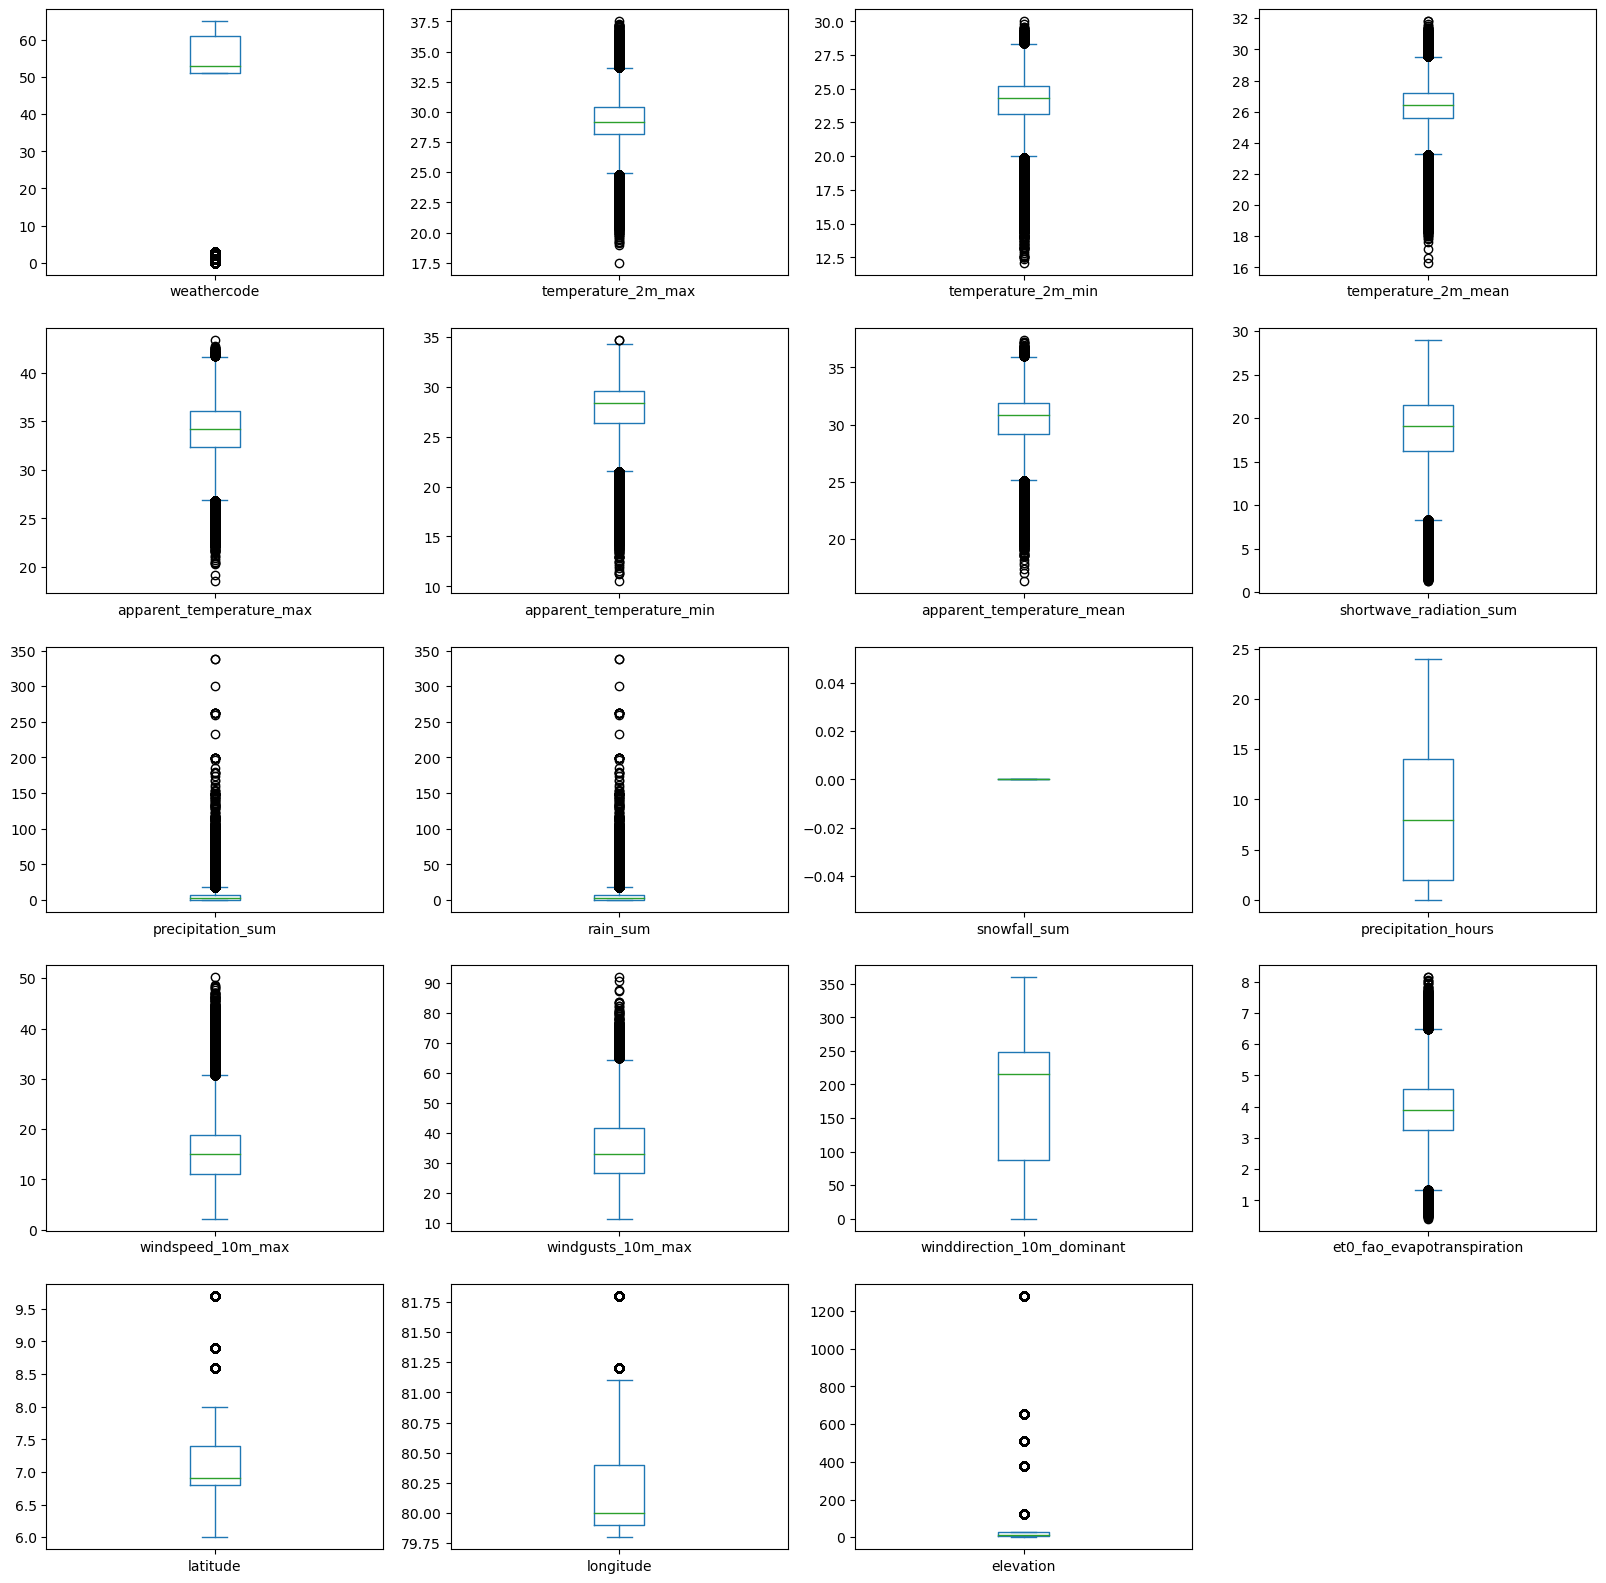

In [16]:
df.plot(kind="box",subplots=True,layout=(5,4),figsize=(20,20))

In [21]:
dataset1 = df.copy()

In [22]:
#handelling outlieres using IQR method
for col in dataset1:
    if pd.api.types.is_numeric_dtype(dataset1[col]):
        iqr = 1.5 * (np.percentile(dataset1[col], 75) - np.percentile(dataset1[col], 25))
        upper_bound = iqr + np.percentile(dataset1[col], 75)
        lower_bound = np.percentile(dataset1[col], 25) - iqr
        dataset1.drop(dataset1[(dataset1[col] > upper_bound) | (dataset1[col] < lower_bound)].index, inplace=True)
    else :
        continue

weathercode                      Axes(0.125,0.747241;0.168478x0.132759)
temperature_2m_max            Axes(0.327174,0.747241;0.168478x0.132759)
temperature_2m_min            Axes(0.529348,0.747241;0.168478x0.132759)
temperature_2m_mean           Axes(0.731522,0.747241;0.168478x0.132759)
apparent_temperature_max         Axes(0.125,0.587931;0.168478x0.132759)
apparent_temperature_min      Axes(0.327174,0.587931;0.168478x0.132759)
apparent_temperature_mean     Axes(0.529348,0.587931;0.168478x0.132759)
shortwave_radiation_sum       Axes(0.731522,0.587931;0.168478x0.132759)
precipitation_sum                Axes(0.125,0.428621;0.168478x0.132759)
rain_sum                      Axes(0.327174,0.428621;0.168478x0.132759)
snowfall_sum                  Axes(0.529348,0.428621;0.168478x0.132759)
precipitation_hours           Axes(0.731522,0.428621;0.168478x0.132759)
windspeed_10m_max                 Axes(0.125,0.26931;0.168478x0.132759)
windgusts_10m_max              Axes(0.327174,0.26931;0.168478x0.

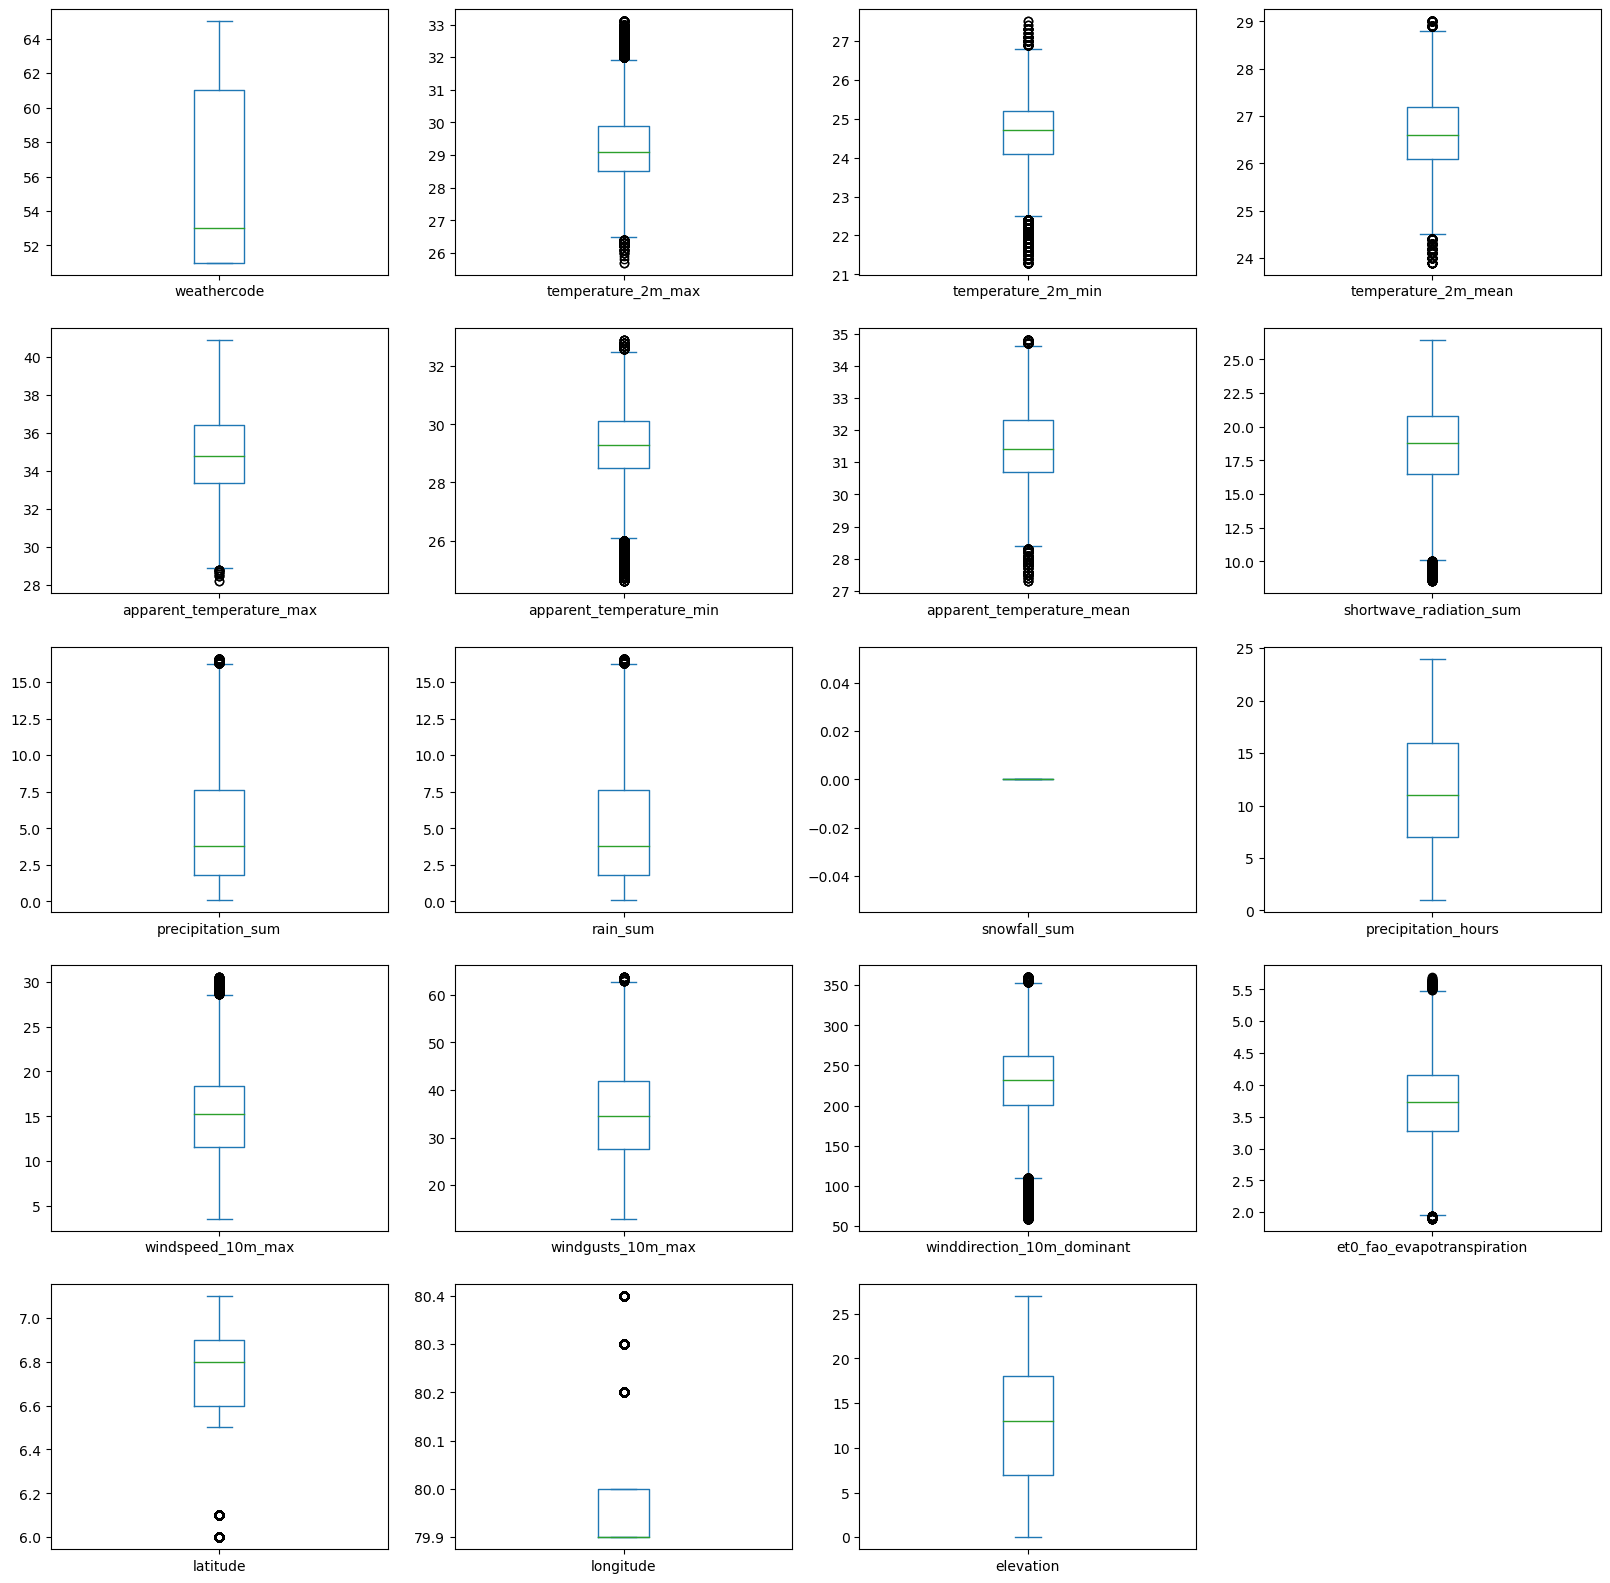

In [23]:
dataset1.plot(kind="box",subplots=True,layout=(5,4),figsize=(20,20))

# Cleaning and partitioning the dataset

In [3]:
df['time'] = pd.to_datetime(df['time'])

# Filter the DataFrame to keep only rows with dates after '2020-01-01'
df = df[df['time'] >= pd.to_datetime('2020-01-01')]

In [4]:
df.head(10)

time  weathercode  temperature_2m_max  temperature_2m_min  \
3652 2020-01-01           51                30.2                23.7   
3653 2020-01-02           61                30.5                23.9   
3654 2020-01-03           51                30.0                23.5   
3655 2020-01-04           53                30.3                24.4   
3656 2020-01-05           51                30.7                23.6   
3657 2020-01-06           51                31.7                23.5   
3658 2020-01-07            2                31.2                24.7   
3659 2020-01-08           51                30.8                23.1   
3660 2020-01-09            1                31.2                22.6   
3661 2020-01-10           51                30.9                22.4   

      temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
3652                 26.9                      36.5                      28.7   
3653                 26.5                      37.1                      29.2   
3654                 27.0                      36.9                      28.5   
3655                 26.9                      37.4                      29.5   
3656                 27.3                      36.6                      28.6   
3657                 27.5                      37.1                      28.4   
3658                 27.4                      36.3                      28.7   
3659                 27.0                      35.0                      26.0   
3660                 26.6                      34.4                      25.7   
3661                 26.7                      34.8                      25.2   

      apparent_temperature_mean           sunrise            sunset  ...  \
3652                       32.4  2020-01-01T00:51  2020-01-01T12:35  ...   
3653                       32.2  2020-01-02T00:52  2020-01-02T12:36  ...   
3654                       32.7  2020-01-03T00:52  2020-01-03T12:36  ...   
3655                       32.7  2020-01-04T00:53  2020-01-04T12:37  ...   
3656                       32.7  2020-01-05T00:53  2020-01-05T12:37  ...   
3657                       32.1  2020-01-06T00:54  2020-01-06T12:38  ...   
3658                       31.6  2020-01-07T00:54  2020-01-07T12:38  ...   
3659                       30.4  2020-01-08T00:54  2020-01-08T12:39  ...   
3660                       29.7  2020-01-09T00:55  2020-01-09T12:39  ...   
3661                       30.0  2020-01-10T00:55  2020-01-10T12:40  ...   

      precipitation_hours  windspeed_10m_max  windgusts_10m_max  \
3652                  7.0                6.5               20.2   
3653                  7.0                6.6               24.1   
3654                  6.0                8.7               20.5   
3655                  7.0                8.6               24.8   
3656                  2.0                7.5               19.1   
3657                  1.0                8.2               21.6   
3658                  0.0               11.6               22.3   
3659                  1.0               10.4               25.6   
3660                  0.0               11.9               25.6   
3661                  1.0               10.5               20.9   

      winddirection_10m_dominant  et0_fao_evapotranspiration  latitude  \
3652                         307                        3.93       7.0   
3653                         111                        3.38       7.0   
3654                         243                        3.98       7.0   
3655                         172                        4.02       7.0   
3656                         204                        4.08       7.0   
3657                          27                        4.42       7.0   
3658                          27                        4.17       7.0   
3659                          20                        4.35       7.0   
3660                          17                        4.74       7.0   
3661       

In [5]:
import pandas as pd



# Grouping the DataFrame by 'city'
grouped = df.groupby('city')

# Creating a dictionary to store dataframes for each city
city_dataframes = {}

# Iterating over each city and its corresponding dataframe
for city, city_df in grouped:
    city_dataframes[city] = city_df


# Accessing data for a specific city, for example, 'New York'




In [6]:
#seperate the datafrmes by city 

for city_name, city_df in city_dataframes.items():
    globals()[city_name] = city_df
    print(f"succeffully creatd the dataframe by city which is : {city_name}")

succeffully creatd the dataframe by city which is : Athurugiriya
succeffully creatd the dataframe by city which is : Badulla
succeffully creatd the dataframe by city which is : Bentota
succeffully creatd the dataframe by city which is : Colombo
succeffully creatd the dataframe by city which is : Galle
succeffully creatd the dataframe by city which is : Gampaha
succeffully creatd the dataframe by city which is : Hambantota
succeffully creatd the dataframe by city which is : Hatton
succeffully creatd the dataframe by city which is : Jaffna
succeffully creatd the dataframe by city which is : Kalmunai
succeffully creatd the dataframe by city which is : Kalutara
succeffully creatd the dataframe by city which is : Kandy
succeffully creatd the dataframe by city which is : Kesbewa
succeffully creatd the dataframe by city which is : Kolonnawa
succeffully creatd the dataframe by city which is : Kurunegala
succeffully creatd the dataframe by city which is : Mabole
succeffully creatd the dataframe

In [7]:
df.describe()

time   weathercode  temperature_2m_max  \
count                37920  37920.000000        37920.000000   
mean   2021-09-23 12:00:00     47.451398           29.360430   
min    2020-01-01 00:00:00      0.000000           20.100000   
25%    2020-11-11 18:00:00     51.000000           28.300000   
50%    2021-09-23 12:00:00     53.000000           29.300000   
75%    2022-08-05 06:00:00     61.000000           30.500000   
max    2023-06-17 00:00:00     65.000000           37.200000   
std                    NaN     20.504045            2.130137   

       temperature_2m_min  temperature_2m_mean  apparent_temperature_max  \
count        37920.000000         37920.000000              37920.000000   
mean            23.933666            26.313681                 34.249802   
min             12.700000            17.200000                 20.300000   
25%             23.200000            25.600000                 32.500000   
50%             24.400000            26.500000                 34.400000   
75%             25.200000            27.400000                 36.300000   
max             30.000000            31.100000                 42.600000   
std              2.075259             1.857586                  2.974473   

       apparent_temperature_min  apparent_temperature_mean  \
count              37920.000000               37920.000000   
mean                  27.777811                  30.438552   
min                   12.400000                  16.300000   
25%                   26.500000                  29.300000   
50%                   28.500000                  30.900000   
75%                   29.700000                  32.100000   
max                   34.700000                  37.200000   
std                    2.865590                   2.562392   

       shortwave_radiation_sum  precipitation_sum      rain_sum  snowfall_sum  \
count             37920.000000       37920.000000  37920.000000       37920.0   
mean                 18.560456           5.669947      5.669947           0.0   
min                   1.360000           0.000000      0.000000           0.0   
25%                  16.230000           0.400000      0.400000           0.0   
50%                  19.190000           2.500000      2.500000           0.0   
75%                  21.610000           7.100000      7.100000           0.0   
max                  28.260000         196.700000    196.700000           0.0   
std                   4.173532           9.101473      9.101473           0.0   

       precipitation_hours  windspeed_10m_max  windgusts_10m_max  \
count         37920.000000       37920.000000       37920.000000   
mean              9.365770          15.402706          34.182547   
min               0.000000           2.300000          11.500000   
25%               3.000000          10.900000          26.300000   
50%               8.000000          14.800000          32.800000   
75%              15.000000          18.800000          40.700000   
max              24.000000          50.200000          91.800000   
std               7.443352           6.120697          10.044164   

       winddirection_10m_dominant  et0_fao_evapotranspiration      latitude  \
count                37920.000000                37920.000000  37920.000000   
mean                   178.791034                    3.919646      7.123334   
min                      0.000000                    0.540000      6.000000   
25%                     84.000000                    3.280000      6.800003   
50%                    209.000000                    3.930000      6.900002   
75%                    244.000000                    4.600000      7.400002   
max                    360.000000                    7.680000      9.700005   
std                     91.208411                    0.997792      0.798628   

          longitude     elevation  
count  37920.000000  37920.000000  
mean      80.263335    111.733333  
min       79.800020      0.000000  
25

## Find the correlation among the dataset

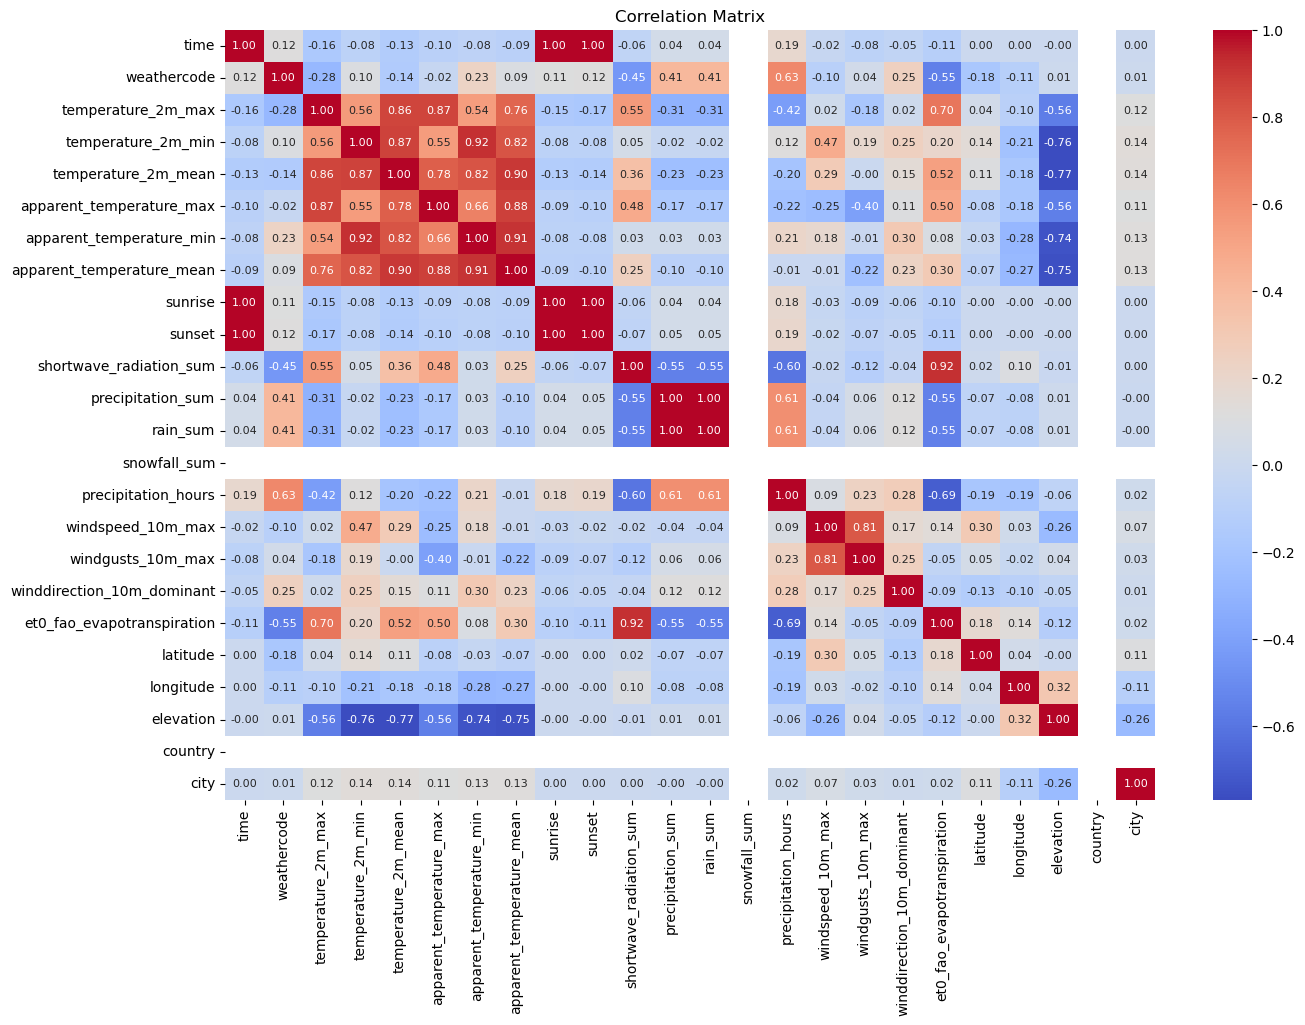

In [24]:
#full heatmap for the dataset
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# Load your data from the CSV file
df = df

# Encode categorical variables
le = LabelEncoder()
df_encoded = df.copy()
for column in df.select_dtypes(include=['object']).columns:
    df_encoded[column] = le.fit_transform(df[column])

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap for the correlation matrix with clearer annotation
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 8})
plt.title("Correlation Matrix")
plt.show()

In [25]:
Ratnapura.head(10)

time  weathercode  temperature_2m_max  temperature_2m_min  \
28232 2020-01-01           51                29.5                22.1   
28233 2020-01-02           53                28.8                22.4   
28234 2020-01-03           51                29.6                21.9   
28235 2020-01-04           51                29.3                22.1   
28236 2020-01-05           51                29.4                21.5   
28237 2020-01-06           51                30.2                20.9   
28238 2020-01-07            3                29.7                23.6   
28239 2020-01-08           51                29.5                21.2   
28240 2020-01-09            2                29.7                20.6   
28241 2020-01-10           51                28.9                20.3   

       temperature_2m_mean  apparent_temperature_max  \
28232                 25.5                      35.2   
28233                 25.2                      35.0   
28234                 25.7                      35.7   
28235                 25.5                      36.7   
28236                 25.5                      36.2   
28237                 26.2                      36.3   
28238                 26.1                      35.6   
28239                 25.4                      35.0   
28240                 25.4                      35.3   
28241                 24.8                      34.7   

       apparent_temperature_min  apparent_temperature_mean           sunrise  \
28232                      26.5                       30.6  2020-01-01T00:49   
28233                      26.7                       30.5  2020-01-02T00:49   
28234                      26.0                       31.0  2020-01-03T00:50   
28235                      26.1                       30.9  2020-01-04T00:50   
28236                      25.3                       30.7  2020-01-05T00:50   
28237                      24.4                       31.1  2020-01-06T00:51   
28238                      27.9                       31.2  2020-01-07T00:51   
28239                      24.8                       30.1  2020-01-08T00:52   
28240                      23.9                       29.7  2020-01-09T00:52   
28241                      23.2                       29.2  2020-01-10T00:52   

                 sunset  ...  windspeed_10m_max  windgusts_10m_max  \
28232  2020-01-01T12:33  ...                6.3               23.4   
28233  2020-01-02T12:34  ...                4.2               31.7   
28234  2020-01-03T12:34  ...                6.3               22.7   
28235  2020-01-04T12:35  ...                5.6               20.9   
28236  2020-01-05T12:35  ...                4.5               18.7   
28237  2020-01-06T12:36  ...                5.2               22.7   
28238  2020-01-07T12:36  ...                4.1               22.7   
28239  2020-01-08T12:37  ...                5.4               16.6   
28240  2020-01-09T12:37  ...                6.6               16.2   
28241  2020-01-10T12:38  ...                5.2               19.8   

       winddirection_10m_dominant  et0_fao_evapotranspiration  latitude  \
28232                          64                        3.82  6.800003   
28233                          85                        3.15  6.800003   
28234                          82                        3.85  6.800003   
28235                         110                        4.06  6.800003   
28236                         131                        3.98  6.800003   
28237                          78                        4.28  6.800003   
28238                          80                        3.86  6.800003   
28239                           6                        3.70  6.800003   
28240                         131                        4.24  6.800003   
28241                         214                        3.58  6.800003   

       longitude  elevation    country       city  average_rainfall_by_week  
28232   80.30002       27.0  Sri La

In [26]:
df['city'].unique()

array(['Colombo', 'Mount Lavinia', 'Kesbewa', 'Moratuwa', 'Maharagama',
       'Ratnapura', 'Kandy', 'Negombo', 'Sri Jayewardenepura Kotte',
       'Kalmunai', 'Trincomalee', 'Galle', 'Jaffna', 'Athurugiriya',
       'Weligama', 'Matara', 'Kolonnawa', 'Gampaha', 'Puttalam',
       'Badulla', 'Kalutara', 'Bentota', 'Matale', 'Mannar', 'Pothuhera',
       'Kurunegala', 'Mabole', 'Hatton', 'Hambantota', 'Oruwala'],
      dtype=object)

we are going to perform time serires anlaysis with cmd plots


In [27]:
Ratnapura.shape

(1264, 25)

In [28]:
Ratnapura.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1264 entries, 28232 to 29495
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        1264 non-null   datetime64[ns]
 1   weathercode                 1264 non-null   int64         
 2   temperature_2m_max          1264 non-null   float64       
 3   temperature_2m_min          1264 non-null   float64       
 4   temperature_2m_mean         1264 non-null   float64       
 5   apparent_temperature_max    1264 non-null   float64       
 6   apparent_temperature_min    1264 non-null   float64       
 7   apparent_temperature_mean   1264 non-null   float64       
 8   sunrise                     1264 non-null   object        
 9   sunset                      1264 non-null   object        
 10  shortwave_radiation_sum     1264 non-null   float64       
 11  precipitation_sum           1264 non-null   float64     

In [29]:
# Convert 'time' column to datetime
Ratnapura['time'] = pd.to_datetime(Ratnapura['time'])

# Group by week and calculate mean rainfall
Ratnapura['average_rainfall_by_week'] = Ratnapura.groupby(pd.Grouper(key='time', freq='W'))['rain_sum'].transform('mean')

In [30]:
Ratnapura.head(10)

time  weathercode  temperature_2m_max  temperature_2m_min  \
28232 2020-01-01           51                29.5                22.1   
28233 2020-01-02           53                28.8                22.4   
28234 2020-01-03           51                29.6                21.9   
28235 2020-01-04           51                29.3                22.1   
28236 2020-01-05           51                29.4                21.5   
28237 2020-01-06           51                30.2                20.9   
28238 2020-01-07            3                29.7                23.6   
28239 2020-01-08           51                29.5                21.2   
28240 2020-01-09            2                29.7                20.6   
28241 2020-01-10           51                28.9                20.3   

       temperature_2m_mean  apparent_temperature_max  \
28232                 25.5                      35.2   
28233                 25.2                      35.0   
28234                 25.7                      35.7   
28235                 25.5                      36.7   
28236                 25.5                      36.2   
28237                 26.2                      36.3   
28238                 26.1                      35.6   
28239                 25.4                      35.0   
28240                 25.4                      35.3   
28241                 24.8                      34.7   

       apparent_temperature_min  apparent_temperature_mean           sunrise  \
28232                      26.5                       30.6  2020-01-01T00:49   
28233                      26.7                       30.5  2020-01-02T00:49   
28234                      26.0                       31.0  2020-01-03T00:50   
28235                      26.1                       30.9  2020-01-04T00:50   
28236                      25.3                       30.7  2020-01-05T00:50   
28237                      24.4                       31.1  2020-01-06T00:51   
28238                      27.9                       31.2  2020-01-07T00:51   
28239                      24.8                       30.1  2020-01-08T00:52   
28240                      23.9                       29.7  2020-01-09T00:52   
28241                      23.2                       29.2  2020-01-10T00:52   

                 sunset  ...  windspeed_10m_max  windgusts_10m_max  \
28232  2020-01-01T12:33  ...                6.3               23.4   
28233  2020-01-02T12:34  ...                4.2               31.7   
28234  2020-01-03T12:34  ...                6.3               22.7   
28235  2020-01-04T12:35  ...                5.6               20.9   
28236  2020-01-05T12:35  ...                4.5               18.7   
28237  2020-01-06T12:36  ...                5.2               22.7   
28238  2020-01-07T12:36  ...                4.1               22.7   
28239  2020-01-08T12:37  ...                5.4               16.6   
28240  2020-01-09T12:37  ...                6.6               16.2   
28241  2020-01-10T12:38  ...                5.2               19.8   

       winddirection_10m_dominant  et0_fao_evapotranspiration  latitude  \
28232                          64                        3.82  6.800003   
28233                          85                        3.15  6.800003   
28234                          82                        3.85  6.800003   
28235                         110                        4.06  6.800003   
28236                         131                        3.98  6.800003   
28237                          78                        4.28  6.800003   
28238                          80                        3.86  6.800003   
28239                           6                        3.70  6.800003   
28240                         131                        4.24  6.800003   
28241                         214                        3.58  6.800003   

       longitude  elevation    country       city  average_rainfall_by_week  
28232   80.30002       27.0  Sri La

In [31]:
Ratnapura.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1264 entries, 28232 to 29495
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        1264 non-null   datetime64[ns]
 1   weathercode                 1264 non-null   int64         
 2   temperature_2m_max          1264 non-null   float64       
 3   temperature_2m_min          1264 non-null   float64       
 4   temperature_2m_mean         1264 non-null   float64       
 5   apparent_temperature_max    1264 non-null   float64       
 6   apparent_temperature_min    1264 non-null   float64       
 7   apparent_temperature_mean   1264 non-null   float64       
 8   sunrise                     1264 non-null   object        
 9   sunset                      1264 non-null   object        
 10  shortwave_radiation_sum     1264 non-null   float64       
 11  precipitation_sum           1264 non-null   float64     

# Data visualization

## For mainly flodding areas ( Districts ) in SriLanka

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
import pandas as pd

In [58]:
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [59]:
cities = pd.DataFrame({'Cities' : df.city.unique()})

In [60]:
latitudes = []
longitudes = []
for i in range(cities['Cities'].size):
    lat = df.loc[df['city'] == cities['Cities'].iloc[i]]['latitude'].iloc[0]
    long = df.loc[df['city'] == cities['Cities'].iloc[i]]['longitude'].iloc[0]
    latitudes.append(lat)
    longitudes.append(long)
cities['latitude'] = latitudes; cities['longitude'] = longitudes

In [61]:
# Create a map
m_1 = folium.Map(width = 600, height = 400, location=[7.877083,80.697917], tiles='cartodbpositronnolabels', zoom_start=7, zoom_control=False,
               scrollWheelZoom=False,
               dragging=False)

    
for idx, row in cities.iterrows():
    folium.Circle(location = [row['latitude'], row['longitude']], 
                  radius = 2000,
                 ).add_child(folium.Popup(row['Cities'])).add_to(m_1)
# Display the map
m_1

# City - Colombo

In [62]:
cities = df.city.unique()
#collecting data for colombo
weather_sl_colombo = df[df['city'] == 'Colombo']
#changing date format
def dateTime(row):
    new_time = pd.to_datetime(row.time)
    row['time'] = new_time
    return row

weatherDate = weather_sl_colombo.apply(dateTime, axis='columns')
#dropping unwanted, redundant columns
weather_colombo = weatherDate.drop(columns = ['country', 'temperature_2m_max', 'temperature_2m_min', 'sunrise', 'sunset','apparent_temperature_max','apparent_temperature_min','snowfall_sum', 'longitude', 'latitude', 'elevation'])
weather_colombo.set_index('time', drop = True, inplace = True)
weather_colombo.head()

weathercode  temperature_2m_mean  apparent_temperature_mean  \
time                                                                      
2020-01-01           51                 26.9                       32.4   
2020-01-02           61                 26.5                       32.2   
2020-01-03           51                 27.0                       32.7   
2020-01-04           53                 26.9                       32.7   
2020-01-05           51                 27.3                       32.7   

            shortwave_radiation_sum  precipitation_sum  rain_sum  \
time                                                               
2020-01-01                    19.28                1.1       1.1   
2020-01-02                    16.37                6.7       6.7   
2020-01-03                    19.41                1.1       1.1   
2020-01-04                    19.95                1.7       1.7   
2020-01-05                    19.66                0.2       0.2   

            precipitation_hours  windspeed_10m_max  windgusts_10m_max  \
time                                                                    
2020-01-01                  7.0                6.5               20.2   
2020-01-02                  7.0                6.6               24.1   
2020-01-03                  6.0                8.7               20.5   
2020-01-04                  7.0                8.6               24.8   
2020-01-05                  2.0                7.5               19.1   

            winddirection_10m_dominant  et0_fao_evapotranspiration     city  
time                                                                         
2020-01-01                         307                        3.93  Colombo  
2020-01-02                         111                        3.38  Colombo  
2020-01-03                         243                        3.98  Colombo  
2020-01-04                         172                        4.02  Colombo  
2020-01-05                         204                        4.08  Colombo

Text(0.5, 1.0, 'Monthly Rainfall in Colombo, Sri Lanka, from 2020')

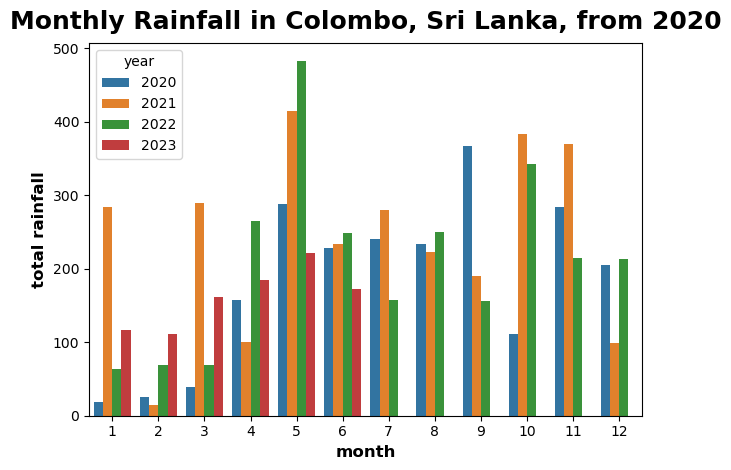

In [63]:
# months = weather_kandy.month.unique()
annual_rainfall = weather_colombo.groupby([weather_colombo.index.year, weather_colombo.index.month]).rain_sum.sum()
annual_rainfall.index.names = ['year', 'month']

rainfall_series = annual_rainfall.loc[[2020,2021,2022,2023]]
monthly_rainfall_by_year = pd.DataFrame({'total rainfall' : rainfall_series}).reset_index()

sns.barplot( x= 'month' , y = 'total rainfall', hue = 'year', data = monthly_rainfall_by_year)
plt.title('Monthly Rainfall in Colombo, Sri Lanka, from 2020')

<Axes: xlabel='month', ylabel='year'>

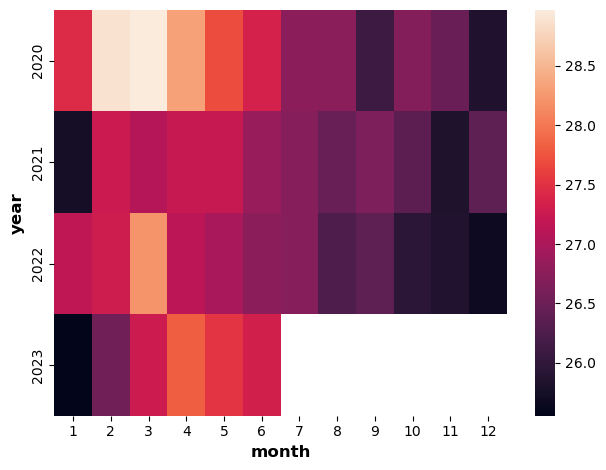

In [64]:
avg_temp = weather_colombo.groupby([weather_colombo.index.year, weather_colombo.index.month]).aggregate(
    {'apparent_temperature_mean': 'mean', 'temperature_2m_mean': 'mean'})
avg_temp.index.names = ['year', 'month']

avg_temp = avg_temp.reset_index()

glue = avg_temp.pivot(index="year", columns="month", values="temperature_2m_mean")
sns.heatmap(glue)

In [65]:
weather_colombo.tail()

weathercode  temperature_2m_mean  apparent_temperature_mean  \
time                                                                      
2023-06-13           63                 27.0                       32.2   
2023-06-14           63                 27.4                       32.8   
2023-06-15           53                 27.8                       33.7   
2023-06-16           55                 28.2                       33.0   
2023-06-17           53                 27.4                       32.5   

            shortwave_radiation_sum  precipitation_sum  rain_sum  \
time                                                               
2023-06-13                    17.28               18.1      18.1   
2023-06-14                    13.37                8.9       8.9   
2023-06-15                    15.49                3.9       3.9   
2023-06-16                    18.37                6.0       6.0   
2023-06-17                    15.11                3.4       3.4   

            precipitation_hours  windspeed_10m_max  windgusts_10m_max  \
time                                                                    
2023-06-13                 24.0               16.2               43.6   
2023-06-14                 20.0               17.7               42.1   
2023-06-15                 17.0               13.2               34.2   
2023-06-16                 24.0               21.3               41.0   
2023-06-17                 23.0               17.8               38.5   

            winddirection_10m_dominant  et0_fao_evapotranspiration     city  
time                                                                         
2023-06-13                         257                        3.44  Colombo  
2023-06-14                         260                        2.75  Colombo  
2023-06-15                         250                        3.14  Colombo  
2023-06-16                         254                        3.89  Colombo  
2023-06-17                         253                        3.08  Colombo

Text(0, 0.5, 'Recorded Average Temperature')

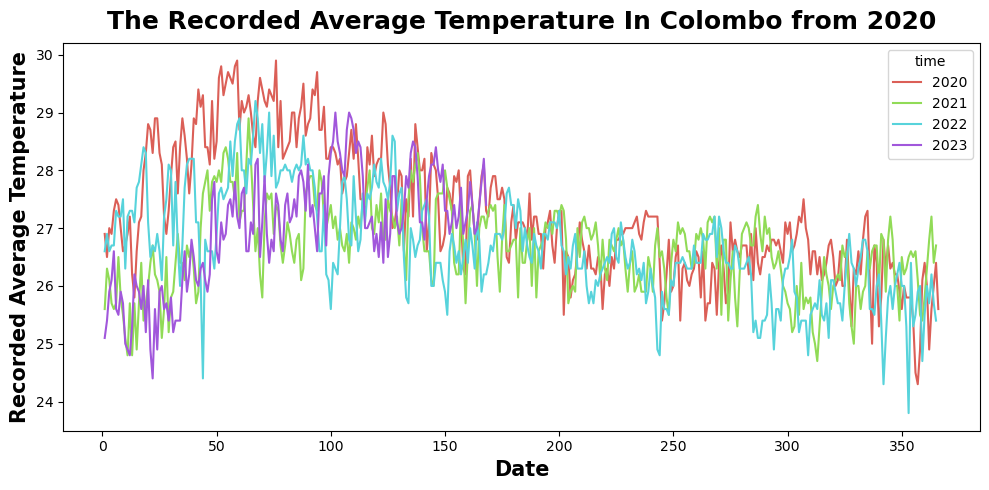

In [66]:
T = weather_colombo['temperature_2m_mean']
fig = plt.subplots(figsize=(10, 5))
palette = sns.color_palette("hls", 4)
sns.lineplot(x=T.index.dayofyear, 
             y=T, 
             hue=T.index.year,
            palette=palette,);
plt.title('The Recorded Average Temperature In Colombo from 2020')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Recorded Average Temperature', fontsize=15)

In [67]:
from sklearn.linear_model import LinearRegression

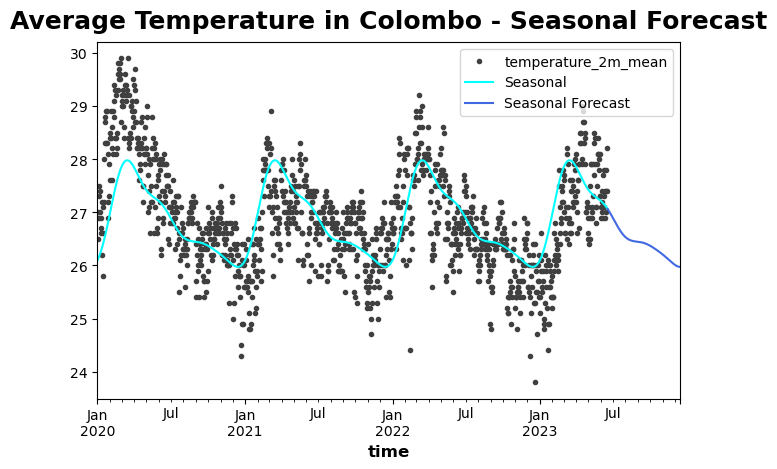

In [68]:
from statsmodels.tsa.deterministic import CalendarFourier
# seasonal forecasting using fourier features
fourier = CalendarFourier(freq="A", order=4) 
X = fourier.in_sample(T.index)
y = T
model = LinearRegression()
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = fourier.out_of_sample(steps = 180, index = pd.date_range("2020-01-01", "2023-06-17", freq="D"))
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Average Temperature in Colombo - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal", color = 'cyan')
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='royalblue')
_ = ax.legend()

In [80]:
codes_list = df.weathercode.unique()
codes_list

array([51, 61, 53,  2,  1,  0,  3, 63, 55, 65], dtype=int64)

Text(0, 0.5, 'Total Rainfall')

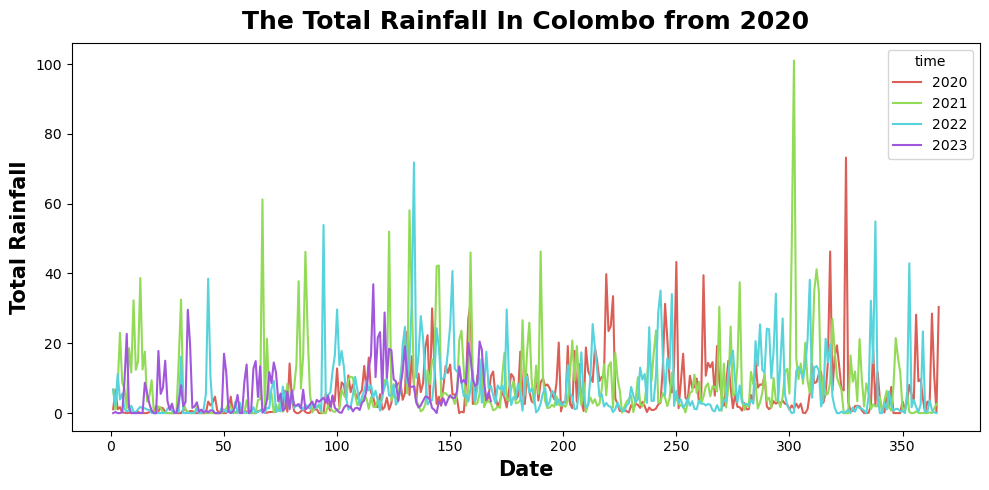

In [69]:
R = weather_colombo['rain_sum']
fig = plt.subplots(figsize=(10, 5))
palette = sns.color_palette("hls", 4)
sns.lineplot(x=R.index.dayofyear, 
             y=R, 
             hue=R.index.year,
            palette=palette,);
plt.title('The Total Rainfall In Colombo from 2020')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Total Rainfall', fontsize=15)

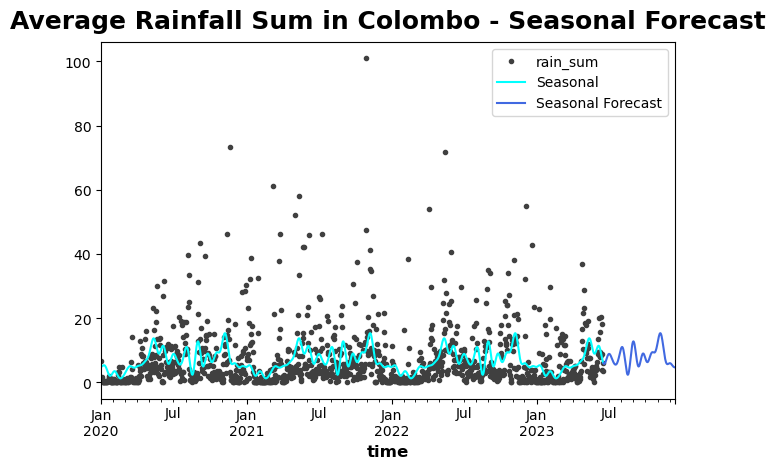

In [77]:
from statsmodels.tsa.deterministic import CalendarFourier
# seasonal forecasting using fourier features
fourier = CalendarFourier(freq="A", order=18) 
X = fourier.in_sample(R.index)
y = R
model = LinearRegression()
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = fourier.out_of_sample(steps = 180, index = pd.date_range("2020-01-01", "2023-06-17", freq="D"))
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Average Rainfall Sum in Colombo - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal", color = 'cyan')
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='royalblue')
_ = ax.legend()

# City - Gampaha

In [81]:
cities = df.city.unique()
#collecting data for kandy
weather_sl_gampaha = df[df['city'] == 'Gampaha']
#changing date format
def dateTime(row):
    new_time = pd.to_datetime(row.time)
    row['time'] = new_time
    return row

weatherDate = weather_sl_gampaha.apply(dateTime, axis='columns')
#dropping unwanted, redundant columns
weather_gampaha = weatherDate.drop(columns = ['country', 'temperature_2m_max', 'temperature_2m_min', 'sunrise', 'sunset','apparent_temperature_max','apparent_temperature_min','snowfall_sum', 'longitude', 'latitude', 'elevation'])
weather_gampaha.set_index('time', drop = True, inplace = True)
weather_gampaha.head()

weathercode  temperature_2m_mean  apparent_temperature_mean  \
time                                                                      
2020-01-01           51                 26.9                       32.6   
2020-01-02           61                 26.6                       32.3   
2020-01-03           51                 27.1                       32.8   
2020-01-04           51                 26.9                       32.6   
2020-01-05            2                 27.3                       32.8   

            shortwave_radiation_sum  precipitation_sum  rain_sum  \
time                                                               
2020-01-01                    19.79                1.1       1.1   
2020-01-02                    16.84                6.8       6.8   
2020-01-03                    19.73                0.4       0.4   
2020-01-04                    19.66                1.1       1.1   
2020-01-05                    20.49                0.0       0.0   

            precipitation_hours  windspeed_10m_max  windgusts_10m_max  \
time                                                                    
2020-01-01                  7.0                6.4               20.2   
2020-01-02                  6.0                5.9               20.9   
2020-01-03                  3.0                7.6               19.1   
2020-01-04                  7.0                6.1               21.6   
2020-01-05                  0.0                7.0               18.7   

            winddirection_10m_dominant  et0_fao_evapotranspiration     city  
time                                                                         
2020-01-01                         289                        4.04  Gampaha  
2020-01-02                          41                        3.49  Gampaha  
2020-01-03                         235                        4.05  Gampaha  
2020-01-04                         177                        4.04  Gampaha  
2020-01-05                          72                        4.24  Gampaha

Text(0.5, 1.0, 'MMonthly Rainfall in Gamapaha, Sri Lanka, from 2020')

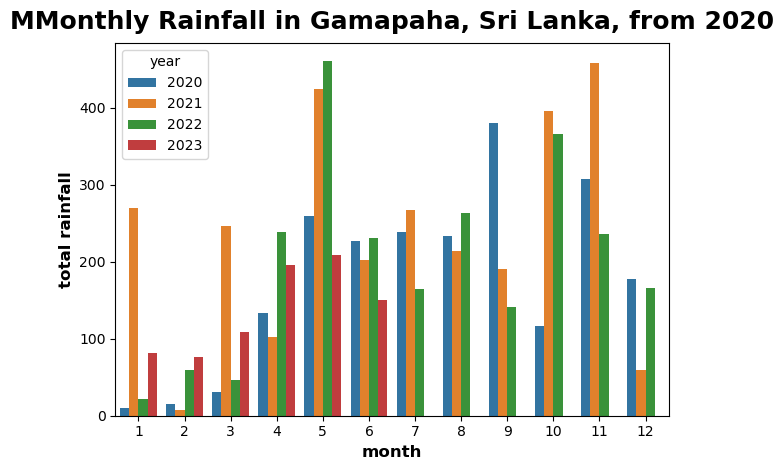

In [82]:
# months = weather_kandy.month.unique()
annual_rainfall = weather_gampaha.groupby([weather_gampaha.index.year, weather_gampaha.index.month]).rain_sum.sum()
annual_rainfall.index.names = ['year', 'month']

rainfall_series = annual_rainfall.loc[[2020,2021,2022,2023]]
monthly_rainfall_by_year = pd.DataFrame({'total rainfall' : rainfall_series}).reset_index()

sns.barplot( x= 'month' , y = 'total rainfall', hue = 'year', data = monthly_rainfall_by_year)
plt.title('MMonthly Rainfall in Gamapaha, Sri Lanka, from 2020')

<Axes: xlabel='month', ylabel='year'>

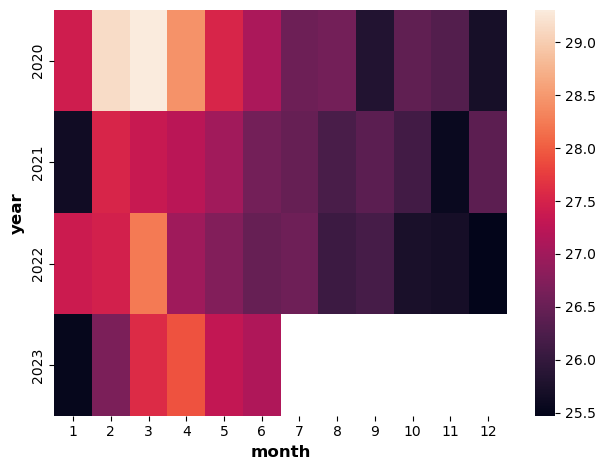

In [83]:
avg_temp = weather_gampaha.groupby([weather_gampaha.index.year, weather_gampaha.index.month]).aggregate(
    {'apparent_temperature_mean': 'mean', 'temperature_2m_mean': 'mean'})
avg_temp.index.names = ['year', 'month']

avg_temp = avg_temp.reset_index()

glue = avg_temp.pivot(index="year", columns="month", values="temperature_2m_mean")
sns.heatmap(glue)

In [84]:
weather_gampaha.tail()

weathercode  temperature_2m_mean  apparent_temperature_mean  \
time                                                                      
2023-06-13           63                 26.7                       31.9   
2023-06-14           61                 27.2                       32.5   
2023-06-15           51                 27.6                       33.2   
2023-06-16           53                 27.9                       32.8   
2023-06-17           51                 27.1                       32.2   

            shortwave_radiation_sum  precipitation_sum  rain_sum  \
time                                                               
2023-06-13                    17.20               17.0      17.0   
2023-06-14                    14.97                7.3       7.3   
2023-06-15                    15.89                3.2       3.2   
2023-06-16                    19.21                5.6       5.6   
2023-06-17                    14.80                5.0       5.0   

            precipitation_hours  windspeed_10m_max  windgusts_10m_max  \
time                                                                    
2023-06-13                 23.0               15.6               43.6   
2023-06-14                 19.0               16.4               40.0   
2023-06-15                 17.0               12.6               32.4   
2023-06-16                 24.0               20.5               41.8   
2023-06-17                 23.0               16.3               37.8   

            winddirection_10m_dominant  et0_fao_evapotranspiration     city  
time                                                                         
2023-06-13                         229                        3.42  Gampaha  
2023-06-14                         224                        3.03  Gampaha  
2023-06-15                         218                        3.26  Gampaha  
2023-06-16                         236                        3.99  Gampaha  
2023-06-17                         231                        2.99  Gampaha

Text(0, 0.5, 'Recorded Average Temperature')

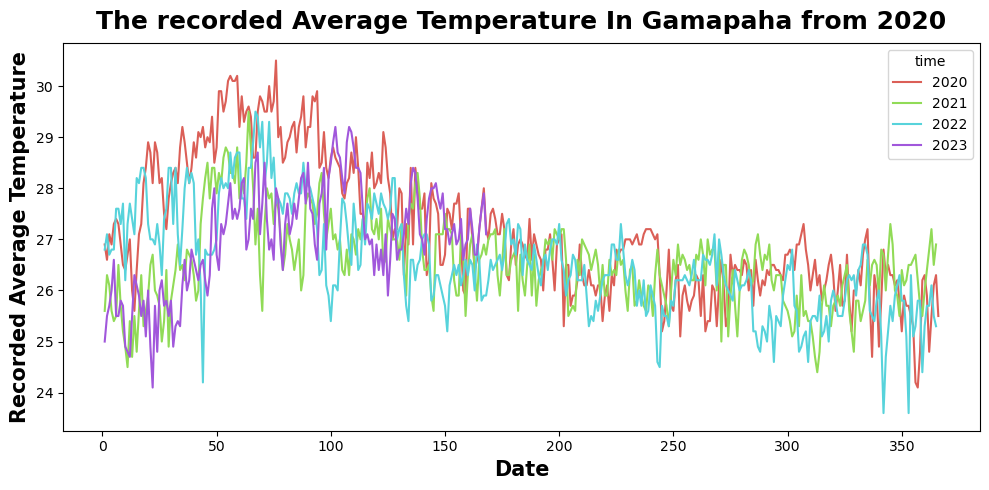

In [85]:
T = weather_gampaha['temperature_2m_mean']
fig = plt.subplots(figsize=(10, 5))
palette = sns.color_palette("hls", 4)
sns.lineplot(x=T.index.dayofyear, 
             y=T, 
             hue=T.index.year,
            palette=palette,);
plt.title('The recorded Average Temperature In Gamapaha from 2020')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Recorded Average Temperature', fontsize=15)

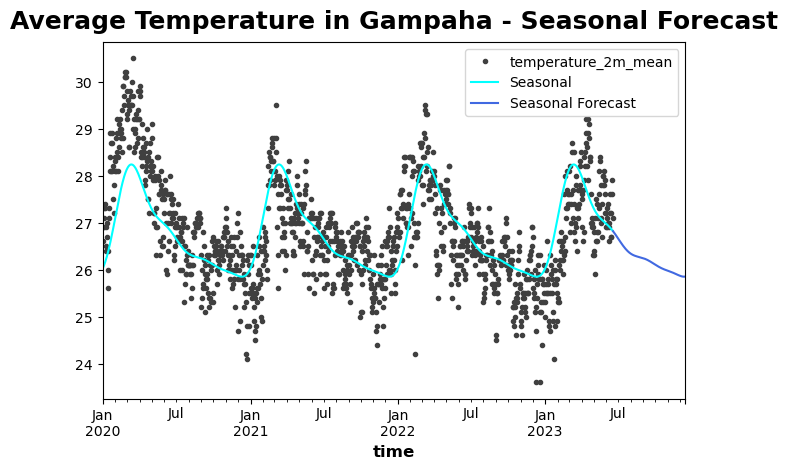

In [86]:
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier
# seasonal forecasting using fourier features
fourier = CalendarFourier(freq="A", order=4) 
X = fourier.in_sample(T.index)
y = T
model = LinearRegression()
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = fourier.out_of_sample(steps = 180, index = pd.date_range("2020-01-01", "2023-06-17", freq="D"))
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Average Temperature in Gampaha - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal", color = 'cyan')
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='royalblue')
_ = ax.legend()

Text(0, 0.5, 'Total Rainfall')

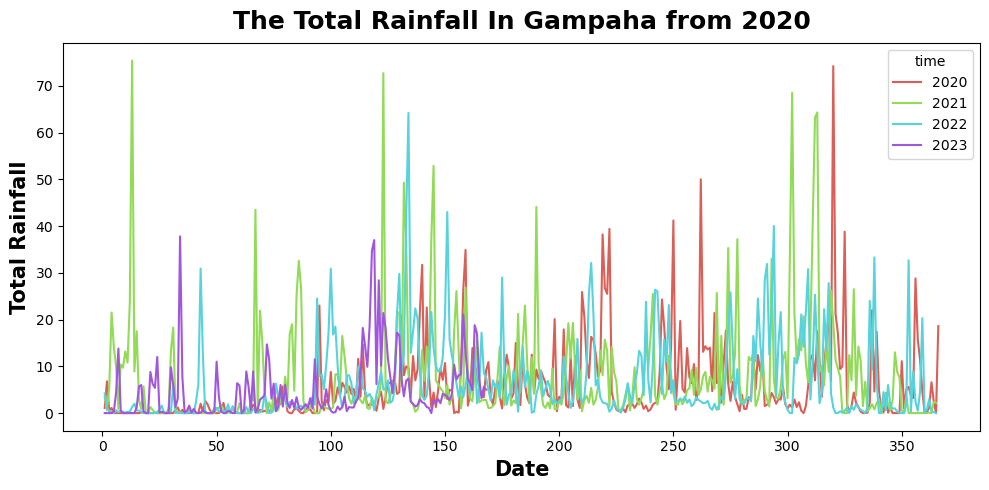

In [87]:
R = weather_gampaha['rain_sum']
fig = plt.subplots(figsize=(10, 5))
palette = sns.color_palette("hls", 4)
sns.lineplot(x=R.index.dayofyear, 
             y=R, 
             hue=R.index.year,
            palette=palette,);
plt.title('The Total Rainfall In Gampaha from 2020')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Total Rainfall', fontsize=15)

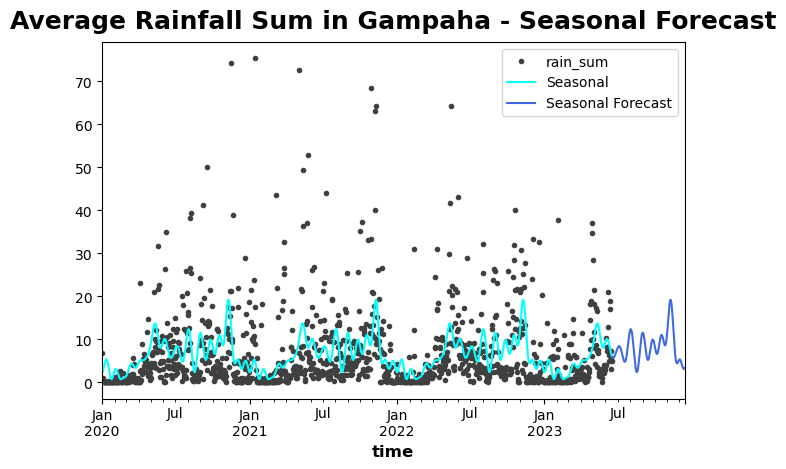

In [88]:
from statsmodels.tsa.deterministic import CalendarFourier
# seasonal forecasting using fourier features
fourier = CalendarFourier(freq="A", order=18) 
X = fourier.in_sample(R.index)
y = R
model = LinearRegression()
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = fourier.out_of_sample(steps = 180, index = pd.date_range("2020-01-01", "2023-06-17", freq="D"))
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Average Rainfall Sum in Gampaha - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal", color = 'cyan')
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='royalblue')
_ = ax.legend()

# City - Ratnapura

In [89]:
cities = df.city.unique()
#collecting data for kandy
weather_sl_ratnapura = df[df['city'] == 'Ratnapura']
#changing date format
def dateTime(row):
    new_time = pd.to_datetime(row.time)
    row['time'] = new_time
    return row

weatherDate = weather_sl_ratnapura.apply(dateTime, axis='columns')
#dropping unwanted, redundant columns
weather_ratnapura = weatherDate.drop(columns = ['country', 'temperature_2m_max', 'temperature_2m_min', 'sunrise', 'sunset','apparent_temperature_max','apparent_temperature_min','snowfall_sum', 'longitude', 'latitude', 'elevation'])
weather_ratnapura.set_index('time', drop = True, inplace = True)
weather_ratnapura.head()

weathercode  temperature_2m_mean  apparent_temperature_mean  \
time                                                                      
2020-01-01           51                 25.5                       30.6   
2020-01-02           53                 25.2                       30.5   
2020-01-03           51                 25.7                       31.0   
2020-01-04           51                 25.5                       30.9   
2020-01-05           51                 25.5                       30.7   

            shortwave_radiation_sum  precipitation_sum  rain_sum  \
time                                                               
2020-01-01                    19.17                0.4       0.4   
2020-01-02                    15.68                3.2       3.2   
2020-01-03                    19.41                1.0       1.0   
2020-01-04                    20.26                1.5       1.5   
2020-01-05                    19.80                0.6       0.6   

            precipitation_hours  windspeed_10m_max  windgusts_10m_max  \
time                                                                    
2020-01-01                  3.0                6.3               23.4   
2020-01-02                  6.0                4.2               31.7   
2020-01-03                  6.0                6.3               22.7   
2020-01-04                  5.0                5.6               20.9   
2020-01-05                  5.0                4.5               18.7   

            winddirection_10m_dominant  et0_fao_evapotranspiration       city  
time                                                                           
2020-01-01                          64                        3.82  Ratnapura  
2020-01-02                          85                        3.15  Ratnapura  
2020-01-03                          82                        3.85  Ratnapura  
2020-01-04                         110                        4.06  Ratnapura  
2020-01-05                         131                        3.98  Ratnapura

Text(0.5, 1.0, 'Monthly Rainfall in Ratnapura, Sri Lanka, from 2020')

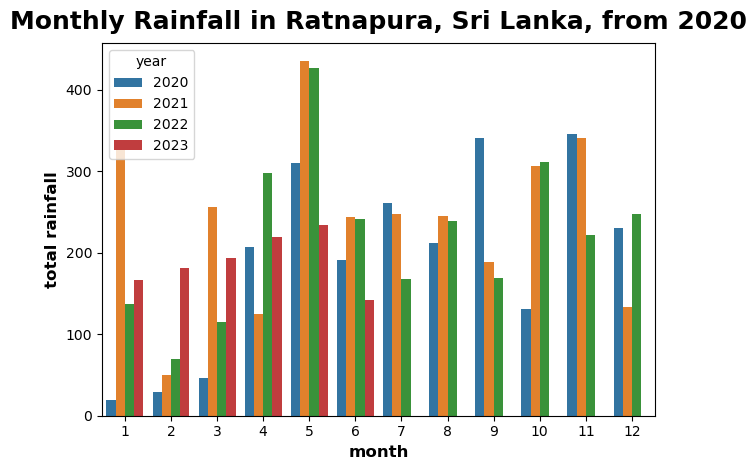

In [90]:
# months = weather_kandy.month.unique()
annual_rainfall = weather_ratnapura.groupby([weather_ratnapura.index.year, weather_ratnapura.index.month]).rain_sum.sum()
annual_rainfall.index.names = ['year', 'month']

rainfall_series = annual_rainfall.loc[[2020,2021,2022,2023]]
monthly_rainfall_by_year = pd.DataFrame({'total rainfall' : rainfall_series}).reset_index()

sns.barplot( x= 'month' , y = 'total rainfall', hue = 'year', data = monthly_rainfall_by_year)
plt.title('Monthly Rainfall in Ratnapura, Sri Lanka, from 2020')

<Axes: xlabel='month', ylabel='year'>

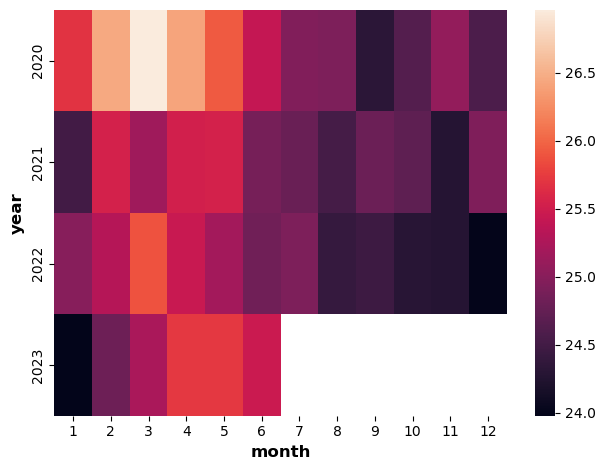

In [91]:
avg_temp = weather_ratnapura.groupby([weather_ratnapura.index.year, weather_ratnapura.index.month]).aggregate(
    {'apparent_temperature_mean': 'mean', 'temperature_2m_mean': 'mean'})
avg_temp.index.names = ['year', 'month']

avg_temp = avg_temp.reset_index()

glue = avg_temp.pivot(index="year", columns="month", values="temperature_2m_mean")
sns.heatmap(glue)

In [92]:
weather_ratnapura.tail()

weathercode  temperature_2m_mean  apparent_temperature_mean  \
time                                                                      
2023-06-13           63                 25.2                       29.9   
2023-06-14           63                 25.3                       30.2   
2023-06-15           53                 25.5                       30.5   
2023-06-16           53                 25.9                       30.5   
2023-06-17           53                 25.4                       30.0   

            shortwave_radiation_sum  precipitation_sum  rain_sum  \
time                                                               
2023-06-13                    17.92               13.4      13.4   
2023-06-14                    13.76                8.4       8.4   
2023-06-15                    14.96                4.2       4.2   
2023-06-16                    17.55                6.6       6.6   
2023-06-17                    15.56                4.4       4.4   

            precipitation_hours  windspeed_10m_max  windgusts_10m_max  \
time                                                                    
2023-06-13                 23.0               15.2               42.5   
2023-06-14                 16.0               17.1               41.0   
2023-06-15                 17.0               14.3               36.0   
2023-06-16                 24.0               18.8               41.0   
2023-06-17                 22.0               16.9               37.8   

            winddirection_10m_dominant  et0_fao_evapotranspiration       city  
time                                                                           
2023-06-13                         284                        3.34  Ratnapura  
2023-06-14                         296                        2.61  Ratnapura  
2023-06-15                         291                        2.91  Ratnapura  
2023-06-16                         273                        3.29  Ratnapura  
2023-06-17                         274                        2.96  Ratnapura

Text(0, 0.5, 'Recorded Average Temperature')

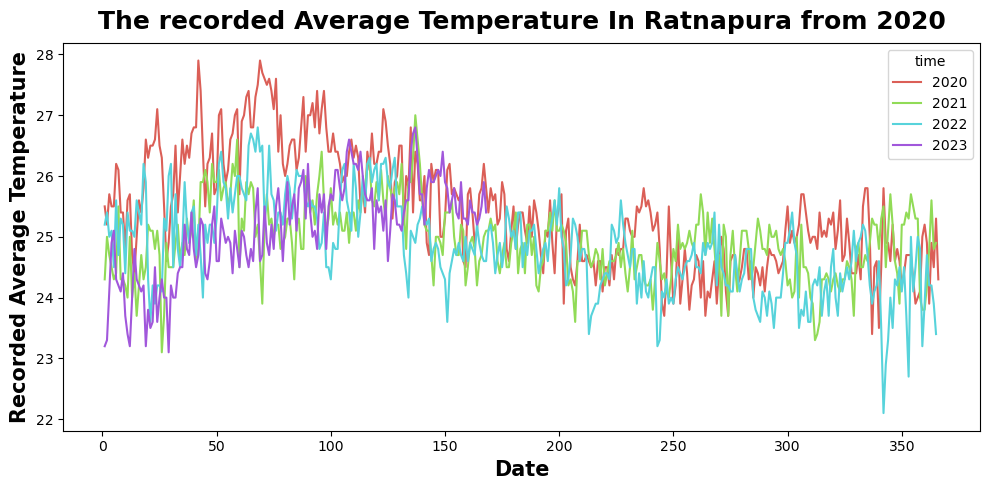

In [93]:
T = weather_ratnapura['temperature_2m_mean']
fig = plt.subplots(figsize=(10, 5))
palette = sns.color_palette("hls", 4)
sns.lineplot(x=T.index.dayofyear, 
             y=T, 
             hue=T.index.year,
            palette=palette,);
plt.title('The recorded Average Temperature In Ratnapura from 2020')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Recorded Average Temperature', fontsize=15)

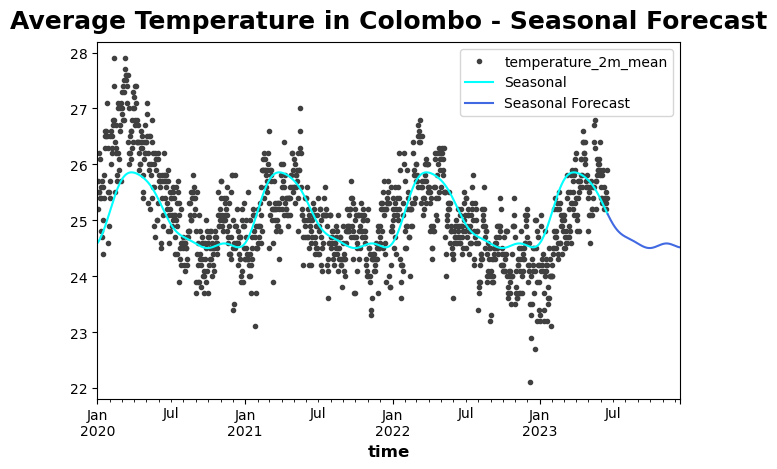

In [94]:
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier
# seasonal forecasting using fourier features
fourier = CalendarFourier(freq="A", order=4) 
X = fourier.in_sample(T.index)
y = T
model = LinearRegression()
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = fourier.out_of_sample(steps = 180, index = pd.date_range("2020-01-01", "2023-06-17", freq="D"))
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Average Temperature in Colombo - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal", color = 'cyan')
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='royalblue')
_ = ax.legend()

Text(0, 0.5, 'Total Rainfall')

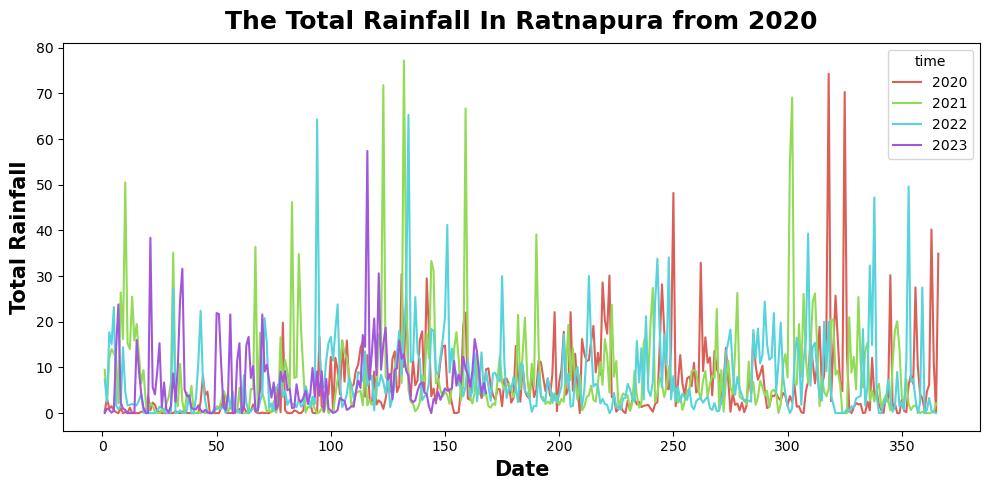

In [95]:
R = weather_ratnapura['rain_sum']
fig = plt.subplots(figsize=(10, 5))
palette = sns.color_palette("hls", 4)
sns.lineplot(x=R.index.dayofyear, 
             y=R, 
             hue=R.index.year,
            palette=palette,);
plt.title('The Total Rainfall In Ratnapura from 2020')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Total Rainfall', fontsize=15)

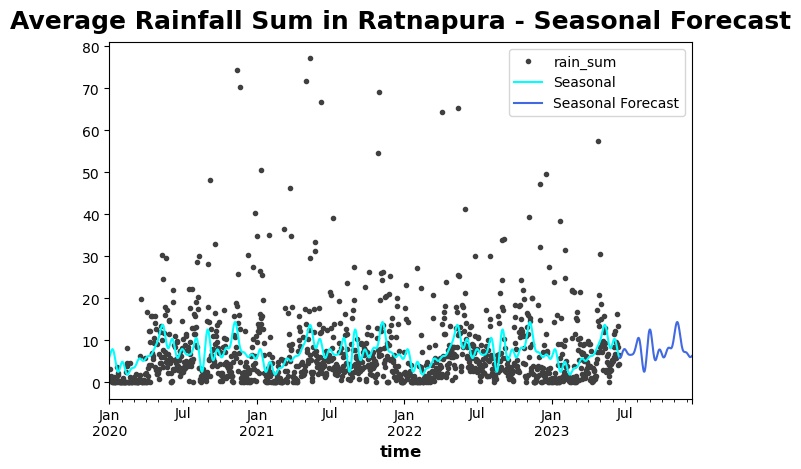

In [96]:
from statsmodels.tsa.deterministic import CalendarFourier
# seasonal forecasting using fourier features
fourier = CalendarFourier(freq="A", order=18) 
X = fourier.in_sample(R.index)
y = R
model = LinearRegression()
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = fourier.out_of_sample(steps = 180, index = pd.date_range("2020-01-01", "2023-06-17", freq="D"))
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Average Rainfall Sum in Ratnapura - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal", color = 'cyan')
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='royalblue')
_ = ax.legend()

# City - Galle

In [97]:
cities = df.city.unique()
#collecting data for kandy
weather_sl_galle = df[df['city'] == 'Galle']
#changing date format
def dateTime(row):
    new_time = pd.to_datetime(row.time)
    row['time'] = new_time
    return row

weatherDate = weather_sl_galle.apply(dateTime, axis='columns')
#dropping unwanted, redundant columns
weather_galle = weatherDate.drop(columns = ['country', 'temperature_2m_max', 'temperature_2m_min', 'sunrise', 'sunset','apparent_temperature_max','apparent_temperature_min','snowfall_sum', 'longitude', 'latitude', 'elevation'])
weather_galle.set_index('time', drop = True, inplace = True)
weather_galle.head()

weathercode  temperature_2m_mean  apparent_temperature_mean  \
time                                                                      
2020-01-01           51                 27.6                       32.2   
2020-01-02           55                 27.0                       31.6   
2020-01-03           51                 27.7                       32.2   
2020-01-04           51                 28.0                       33.3   
2020-01-05           51                 27.8                       32.6   

            shortwave_radiation_sum  precipitation_sum  rain_sum  \
time                                                               
2020-01-01                    20.41                0.7       0.7   
2020-01-02                    17.34                2.3       2.3   
2020-01-03                    20.60                0.9       0.9   
2020-01-04                    21.53                0.5       0.5   
2020-01-05                    21.34                0.4       0.4   

            precipitation_hours  windspeed_10m_max  windgusts_10m_max  \
time                                                                    
2020-01-01                  3.0               18.7               39.6   
2020-01-02                  7.0               17.0               38.5   
2020-01-03                  3.0               21.5               42.5   
2020-01-04                  3.0               13.5               29.2   
2020-01-05                  4.0               16.0               32.8   

            winddirection_10m_dominant  et0_fao_evapotranspiration   city  
time                                                                       
2020-01-01                          76                        4.28  Galle  
2020-01-02                          75                        3.55  Galle  
2020-01-03                          75                        4.31  Galle  
2020-01-04                          62                        4.49  Galle  
2020-01-05                          67                        4.52  Galle

Text(0.5, 1.0, 'Monthly Rainfall in Galle, Sri Lanka, from 2020')

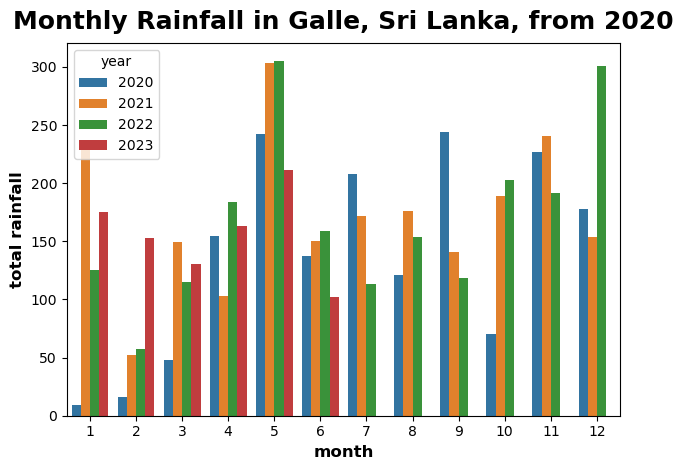

In [98]:
# months = weather_kandy.month.unique()
annual_rainfall = weather_galle.groupby([weather_galle.index.year, weather_galle.index.month]).rain_sum.sum()
annual_rainfall.index.names = ['year', 'month']

rainfall_series = annual_rainfall.loc[[2020,2021,2022,2023]]
monthly_rainfall_by_year = pd.DataFrame({'total rainfall' : rainfall_series}).reset_index()

sns.barplot( x= 'month' , y = 'total rainfall', hue = 'year', data = monthly_rainfall_by_year)
plt.title('Monthly Rainfall in Galle, Sri Lanka, from 2020')

<Axes: xlabel='month', ylabel='year'>

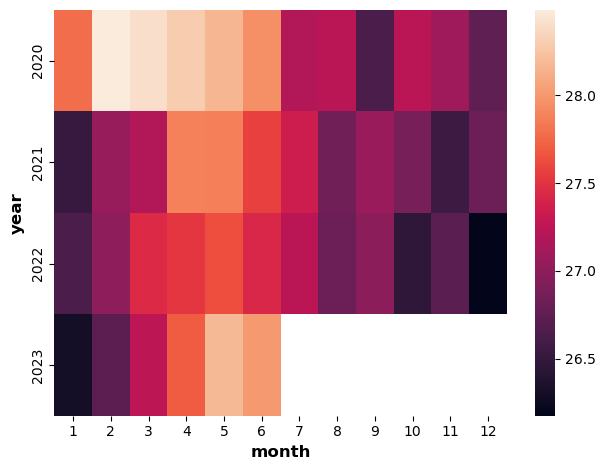

In [99]:
avg_temp = weather_galle.groupby([weather_galle.index.year, weather_galle.index.month]).aggregate(
    {'apparent_temperature_mean': 'mean', 'temperature_2m_mean': 'mean'})
avg_temp.index.names = ['year', 'month']

avg_temp = avg_temp.reset_index()

glue = avg_temp.pivot(index="year", columns="month", values="temperature_2m_mean")
sns.heatmap(glue)

In [100]:
weather_galle.tail()

weathercode  temperature_2m_mean  apparent_temperature_mean  \
time                                                                      
2023-06-13           61                 27.5                       31.6   
2023-06-14           63                 28.2                       32.2   
2023-06-15           51                 28.8                       33.5   
2023-06-16           51                 28.7                       32.4   
2023-06-17           53                 27.9                       31.7   

            shortwave_radiation_sum  precipitation_sum  rain_sum  \
time                                                               
2023-06-13                    20.06                8.0       8.0   
2023-06-14                    18.97                5.6       5.6   
2023-06-15                    17.40                2.2       2.2   
2023-06-16                    18.20                3.0       3.0   
2023-06-17                    17.95                6.2       6.2   

            precipitation_hours  windspeed_10m_max  windgusts_10m_max  \
time                                                                    
2023-06-13                 20.0               23.1               50.8   
2023-06-14                 12.0               27.1               50.8   
2023-06-15                 13.0               23.3               43.2   
2023-06-16                 20.0               27.1               50.0   
2023-06-17                 24.0               26.1               47.9   

            winddirection_10m_dominant  et0_fao_evapotranspiration   city  
time                                                                       
2023-06-13                         278                        3.86  Galle  
2023-06-14                         287                        4.00  Galle  
2023-06-15                         278                        3.82  Galle  
2023-06-16                         269                        4.19  Galle  
2023-06-17                         269                        3.69  Galle

Text(0, 0.5, 'Recorded Average Temperature')

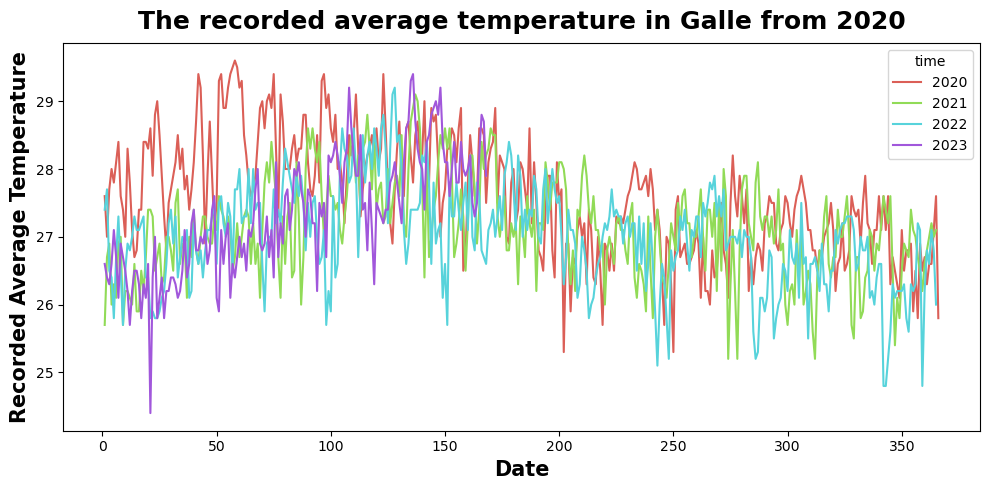

In [101]:
T = weather_galle['temperature_2m_mean']
fig = plt.subplots(figsize=(10, 5))
palette = sns.color_palette("hls", 4)
sns.lineplot(x=T.index.dayofyear, 
             y=T, 
             hue=T.index.year,
            palette=palette,);
plt.title('The recorded average temperature in Galle from 2020')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Recorded Average Temperature', fontsize=15)

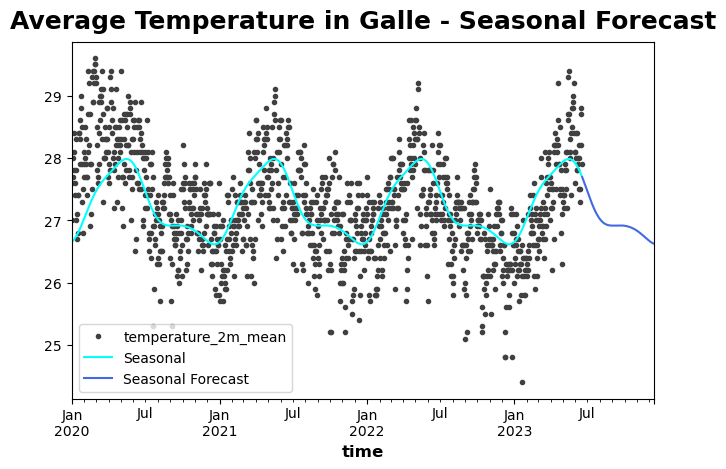

In [102]:
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier
# seasonal forecasting using fourier features
fourier = CalendarFourier(freq="A", order=4) 
X = fourier.in_sample(T.index)
y = T
model = LinearRegression()
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = fourier.out_of_sample(steps = 180, index = pd.date_range("2020-01-01", "2023-06-17", freq="D"))
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Average Temperature in Galle - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal", color = 'cyan')
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='royalblue')
_ = ax.legend()

Text(0, 0.5, 'Total Rainfall')

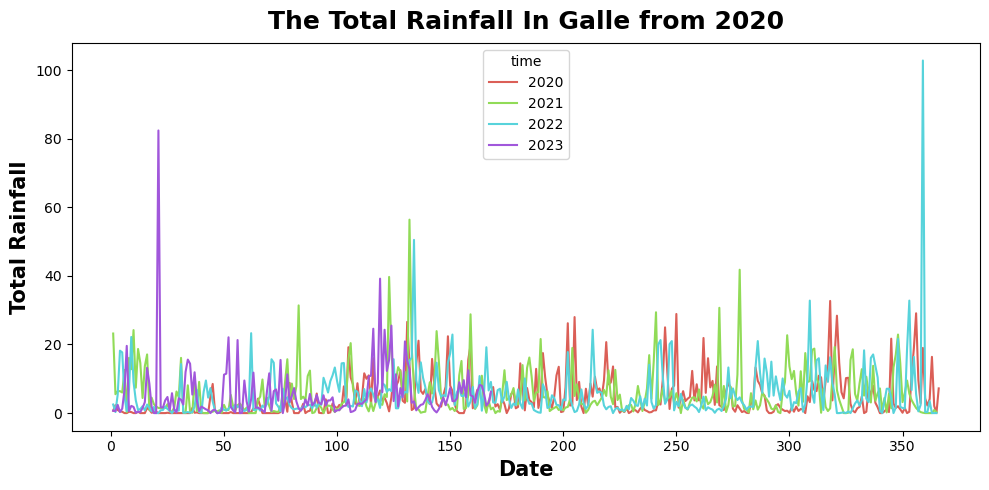

In [103]:
R = weather_galle['rain_sum']
fig = plt.subplots(figsize=(10, 5))
palette = sns.color_palette("hls", 4)
sns.lineplot(x=R.index.dayofyear, 
             y=R, 
             hue=R.index.year,
            palette=palette,);
plt.title('The Total Rainfall In Galle from 2020')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Total Rainfall', fontsize=15)

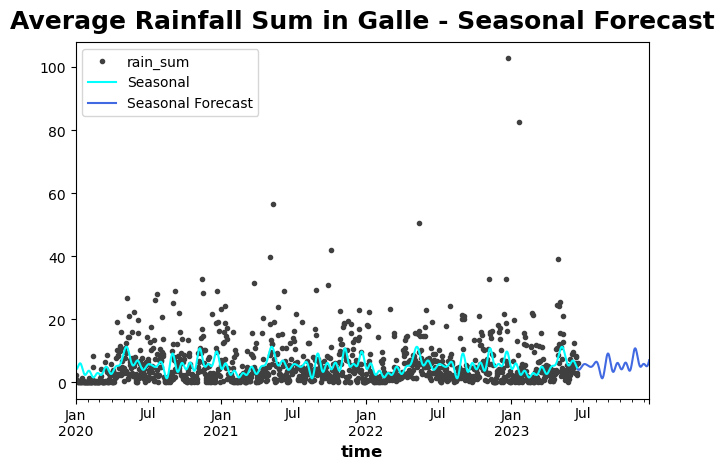

In [104]:
from statsmodels.tsa.deterministic import CalendarFourier
# seasonal forecasting using fourier features
fourier = CalendarFourier(freq="A", order=18) 
X = fourier.in_sample(R.index)
y = R
model = LinearRegression()
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = fourier.out_of_sample(steps = 180, index = pd.date_range("2020-01-01", "2023-06-17", freq="D"))
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Average Rainfall Sum in Galle - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal", color = 'cyan')
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='royalblue')
_ = ax.legend()

# City - Matara

In [105]:
cities = df.city.unique()
#collecting data for kandy
weather_sl_matara = df[df['city'] == 'Matara']
#changing date format
def dateTime(row):
    new_time = pd.to_datetime(row.time)
    row['time'] = new_time
    return row

weatherDate = weather_sl_matara.apply(dateTime, axis='columns')
#dropping unwanted, redundant columns
weather_matara = weatherDate.drop(columns = ['country', 'temperature_2m_max', 'temperature_2m_min', 'sunrise', 'sunset','apparent_temperature_max','apparent_temperature_min','snowfall_sum', 'longitude', 'latitude', 'elevation'])
weather_matara.set_index('time', drop = True, inplace = True)
weather_matara.head()

weathercode  temperature_2m_mean  apparent_temperature_mean  \
time                                                                      
2020-01-01           51                 27.1                       31.4   
2020-01-02           55                 26.5                       30.8   
2020-01-03           51                 27.1                       31.3   
2020-01-04           51                 26.9                       32.0   
2020-01-05           51                 27.0                       31.5   

            shortwave_radiation_sum  precipitation_sum  rain_sum  \
time                                                               
2020-01-01                    20.41                0.7       0.7   
2020-01-02                    17.34                2.3       2.3   
2020-01-03                    20.60                0.9       0.9   
2020-01-04                    21.53                0.5       0.5   
2020-01-05                    21.34                0.4       0.4   

            precipitation_hours  windspeed_10m_max  windgusts_10m_max  \
time                                                                    
2020-01-01                  3.0               18.7               39.6   
2020-01-02                  7.0               17.0               38.5   
2020-01-03                  3.0               21.5               42.5   
2020-01-04                  3.0               13.5               29.2   
2020-01-05                  4.0               16.0               32.8   

            winddirection_10m_dominant  et0_fao_evapotranspiration    city  
time                                                                        
2020-01-01                          76                        4.21  Matara  
2020-01-02                          75                        3.50  Matara  
2020-01-03                          75                        4.27  Matara  
2020-01-04                          62                        4.30  Matara  
2020-01-05                          67                        4.37  Matara

Text(0.5, 1.0, 'Monthly Rainfall in Matara, Sri Lanka, from 2020')

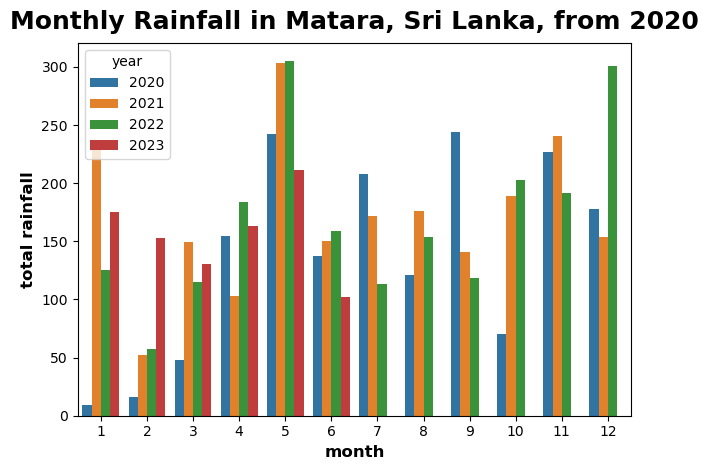

In [106]:
# months = weather_kandy.month.unique()
annual_rainfall = weather_matara.groupby([weather_matara.index.year, weather_matara.index.month]).rain_sum.sum()
annual_rainfall.index.names = ['year', 'month']

rainfall_series = annual_rainfall.loc[[2020,2021,2022,2023]]
monthly_rainfall_by_year = pd.DataFrame({'total rainfall' : rainfall_series}).reset_index()

sns.barplot( x= 'month' , y = 'total rainfall', hue = 'year', data = monthly_rainfall_by_year)
plt.title('Monthly Rainfall in Matara, Sri Lanka, from 2020')

<Axes: xlabel='month', ylabel='year'>

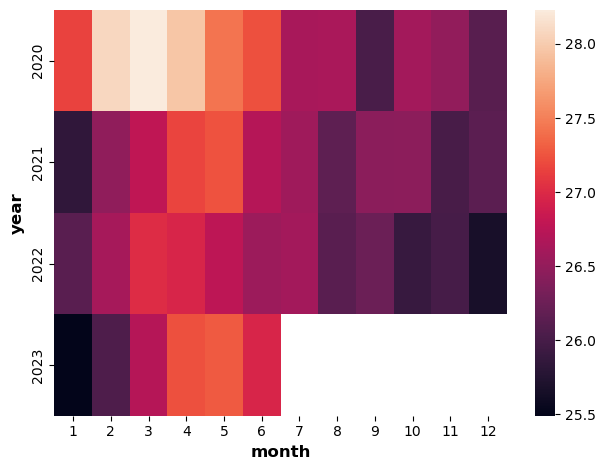

In [107]:
avg_temp = weather_matara.groupby([weather_matara.index.year, weather_matara.index.month]).aggregate(
    {'apparent_temperature_mean': 'mean', 'temperature_2m_mean': 'mean'})
avg_temp.index.names = ['year', 'month']

avg_temp = avg_temp.reset_index()

glue = avg_temp.pivot(index="year", columns="month", values="temperature_2m_mean")
sns.heatmap(glue)

In [108]:
weather_matara.tail()

weathercode  temperature_2m_mean  apparent_temperature_mean  \
time                                                                      
2023-06-13           61                 26.8                       30.5   
2023-06-14           63                 27.2                       30.8   
2023-06-15           51                 27.6                       31.7   
2023-06-16           51                 27.6                       31.0   
2023-06-17           53                 27.1                       30.3   

            shortwave_radiation_sum  precipitation_sum  rain_sum  \
time                                                               
2023-06-13                    20.06                8.0       8.0   
2023-06-14                    18.97                5.6       5.6   
2023-06-15                    17.40                2.2       2.2   
2023-06-16                    18.20                3.0       3.0   
2023-06-17                    17.95                6.2       6.2   

            precipitation_hours  windspeed_10m_max  windgusts_10m_max  \
time                                                                    
2023-06-13                 20.0               23.1               50.8   
2023-06-14                 12.0               27.1               50.8   
2023-06-15                 13.0               23.3               43.2   
2023-06-16                 20.0               27.1               50.0   
2023-06-17                 24.0               26.1               47.9   

            winddirection_10m_dominant  et0_fao_evapotranspiration    city  
time                                                                        
2023-06-13                         278                        3.78  Matara  
2023-06-14                         287                        3.79  Matara  
2023-06-15                         278                        3.62  Matara  
2023-06-16                         269                        3.91  Matara  
2023-06-17                         269                        3.67  Matara

Text(0, 0.5, 'Recorded Average Temperature')

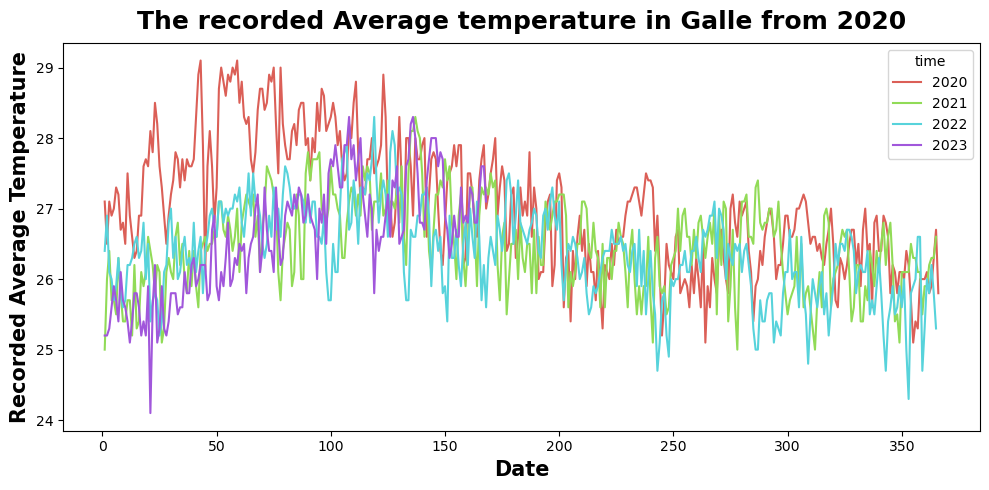

In [109]:
T = weather_matara['temperature_2m_mean']
fig = plt.subplots(figsize=(10, 5))
palette = sns.color_palette("hls", 4)
sns.lineplot(x=T.index.dayofyear, 
             y=T, 
             hue=T.index.year,
            palette=palette,);
plt.title('The recorded Average temperature in Galle from 2020')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Recorded Average Temperature', fontsize=15)

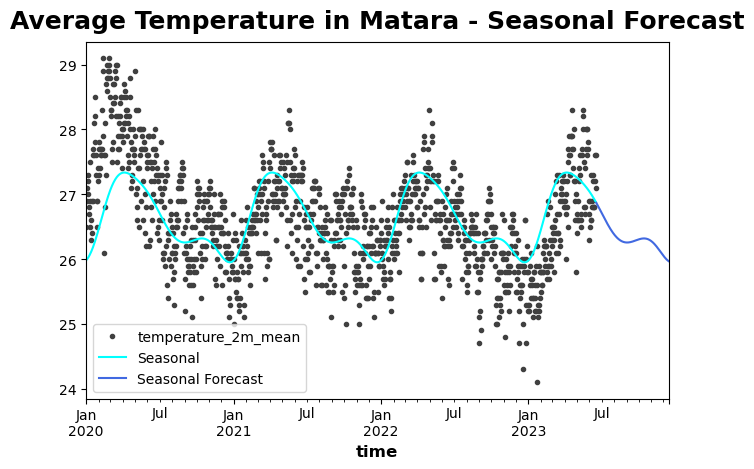

In [110]:
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier
# seasonal forecasting using fourier features
fourier = CalendarFourier(freq="A", order=4) 
X = fourier.in_sample(T.index)
y = T
model = LinearRegression()
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = fourier.out_of_sample(steps = 180, index = pd.date_range("2020-01-01", "2023-06-17", freq="D"))
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Average Temperature in Matara - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal", color = 'cyan')
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='royalblue')
_ = ax.legend()

Text(0, 0.5, 'Total Rainfall')

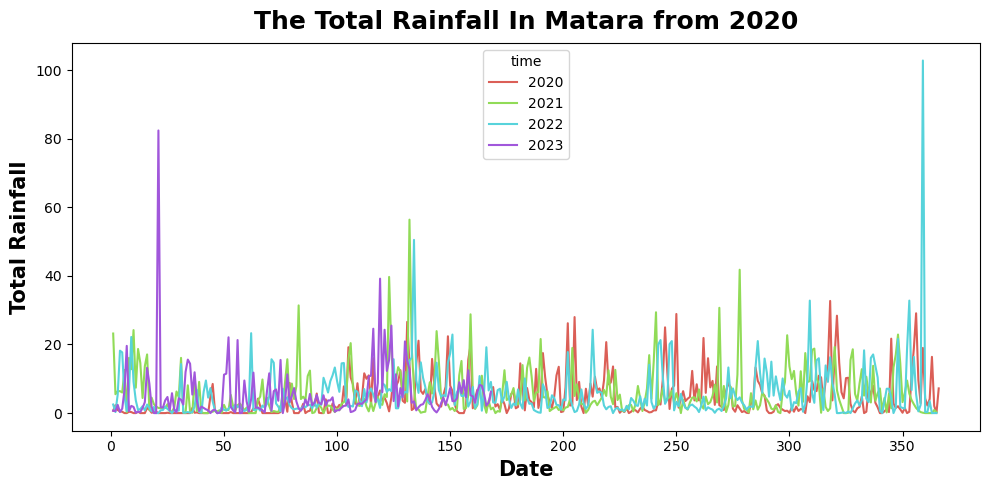

In [111]:
R = weather_matara['rain_sum']
fig = plt.subplots(figsize=(10, 5))
palette = sns.color_palette("hls", 4)
sns.lineplot(x=R.index.dayofyear, 
             y=R, 
             hue=R.index.year,
            palette=palette,);
plt.title('The Total Rainfall In Matara from 2020')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Total Rainfall', fontsize=15)

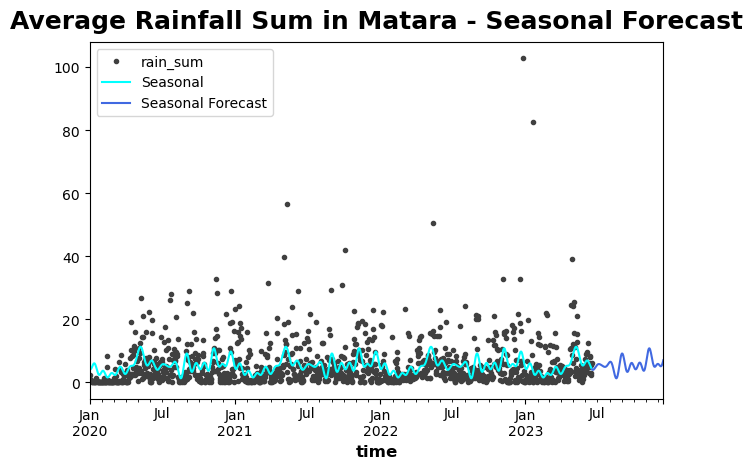

In [112]:
from statsmodels.tsa.deterministic import CalendarFourier
# seasonal forecasting using fourier features
fourier = CalendarFourier(freq="A", order=18) 
X = fourier.in_sample(R.index)
y = R
model = LinearRegression()
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = fourier.out_of_sample(steps = 180, index = pd.date_range("2020-01-01", "2023-06-17", freq="D"))
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Average Rainfall Sum in Matara - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal", color = 'cyan')
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='royalblue')
_ = ax.legend()

# Statistical Analysis (Time series forecasting and modelling)

# Performing Statistical Analysis

## City - Ratnapura

Text(0, 0.5, 'rain_sum')

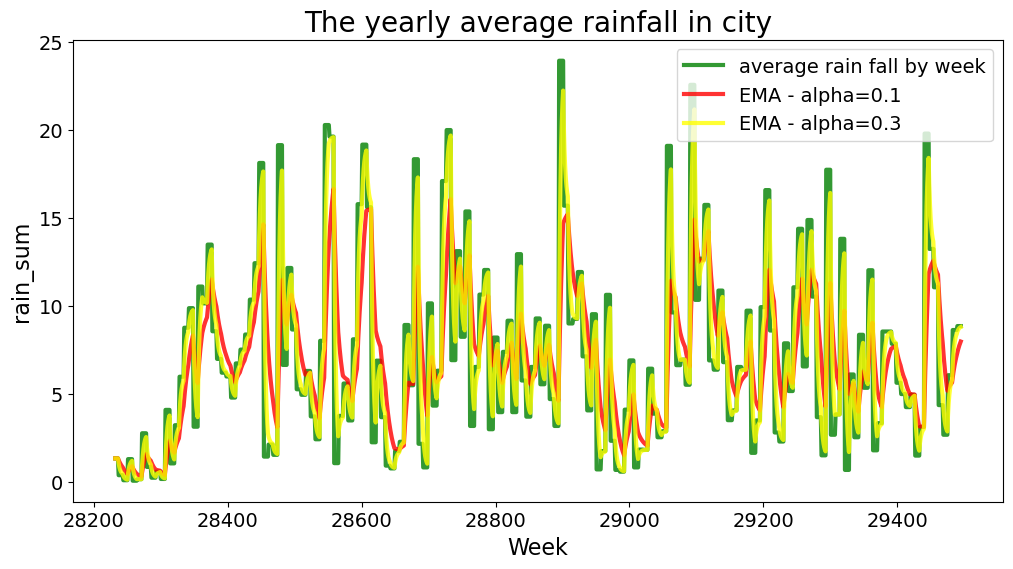

In [32]:
#performing the SMA analysis in for ratnapura 
Ratnapura['EMA_0.1'] = Ratnapura.average_rainfall_by_week.ewm(alpha=0.1, adjust=False).mean()
# Let's smoothing factor  - 0.3
Ratnapura['EMA_0.3'] = Ratnapura.average_rainfall_by_week.ewm(alpha=0.3, adjust=False).mean()

# green - Avg Air Temp, red- smoothing factor - 0.1, yellow - smoothing factor  - 0.3
colors = ['green', 'red', 'yellow']
Ratnapura[['average_rainfall_by_week', 'EMA_0.1', 'EMA_0.3']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['average rain fall by week', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)
plt.title('The yearly average rainfall in city', fontsize=20)
plt.xlabel('Week', fontsize=16)
plt.ylabel('rain_sum', fontsize=16)

In [33]:
# performing ADF for test the stationarity

import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming your dataframe is named 'df' and contains a column named 'average_rainfall'
# Replace 'average_rainfall' with the actual column name containing your average rainfall data

# Example:
# df = pd.read_csv('your_data.csv')

# Perform ADF test
result = adfuller(Ratnapura['average_rainfall_by_week'])

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -5.473177542427401
p-value: 2.373493296249849e-06
Critical Values:
   1%: -3.4356260602190356
   5%: -2.863869899335344
   10%: -2.5680104683371323


In [96]:
# Based on the results of your Augmented Dickey-Fuller (ADF) test:

# ADF Statistic: -5.4731775424274165
# p-value: 2.3734932962496855e-06
# Critical Values:
# 1%: -3.4356260602190356
# 5%: -2.863869899335344
# 10%: -2.5680104683371323
# The ADF statistic is -5.4731775424274165, which is more negative than all the critical values provided at the 1%, 5%, and 10% significance levels. Additionally, the p-value is extremely small (2.37e-06), indicating strong evidence against the null hypothesis of a unit root (i.e., non-stationarity).

# Based on these results, you can confidently reject the null hypothesis and conclude that the data is likely stationary. Therefore, in this context, the ADF statistic of -5.4731775424274165 is indicative of good results, as it suggests that the data is stationary.

Text(0, 0.5, 'Temperature [°C]')

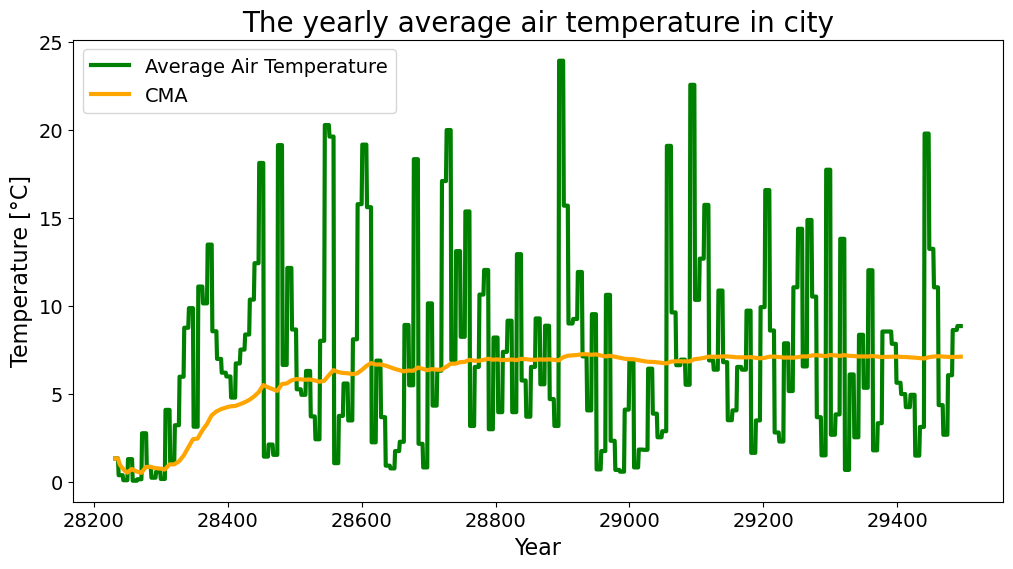

In [34]:
Ratnapura['CMA'] = Ratnapura.average_rainfall_by_week.expanding().mean()

# green -Avg Air Temp and Orange -CMA
colors = ['green', 'orange']
# line plot
Ratnapura[['average_rainfall_by_week', 'CMA']].plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average Air Temperature', 'CMA'], fontsize=14)
plt.title('The yearly average air temperature in city', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

<Figure size 1200x600 with 0 Axes>

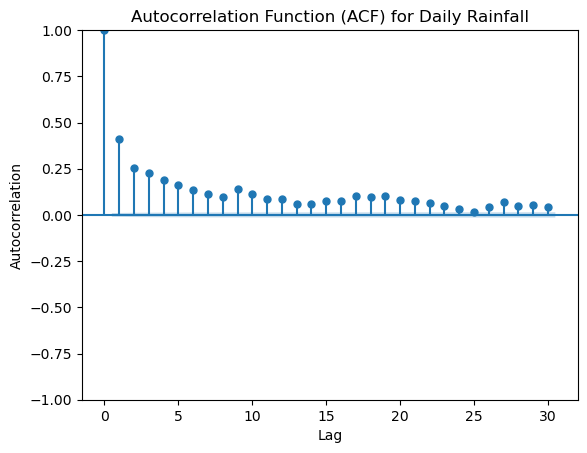

In [35]:
plt.figure(figsize=(12, 6))
plot_acf(df['rain_sum'], lags=30)  # Adjust lags as needed
plt.title('Autocorrelation Function (ACF) for Daily Rainfall')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

<Figure size 1200x600 with 0 Axes>

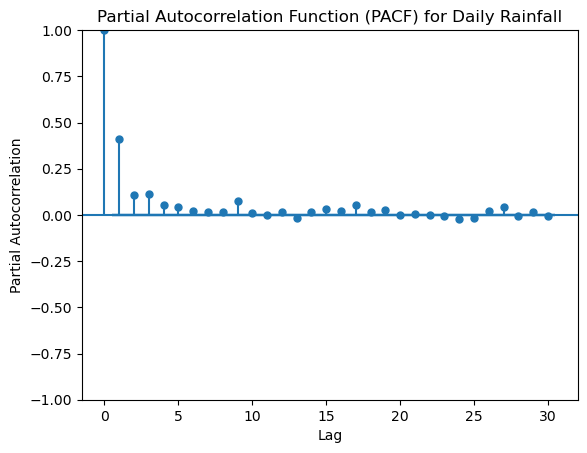

In [36]:
# Plot PACF for daily rainfall
plt.figure(figsize=(12, 6))
plot_pacf(df['rain_sum'], lags=30)  # Adjust lags as needed
plt.title('Partial Autocorrelation Function (PACF) for Daily Rainfall')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [37]:
train_data_ratnapura = Ratnapura.iloc[:int(0.8*len(df))]
test_data_ratnapura = Ratnapura.iloc[int(0.8*len(df)):]

In [38]:
Ratnapura.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1264 entries, 28232 to 29495
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        1264 non-null   datetime64[ns]
 1   weathercode                 1264 non-null   int64         
 2   temperature_2m_max          1264 non-null   float64       
 3   temperature_2m_min          1264 non-null   float64       
 4   temperature_2m_mean         1264 non-null   float64       
 5   apparent_temperature_max    1264 non-null   float64       
 6   apparent_temperature_min    1264 non-null   float64       
 7   apparent_temperature_mean   1264 non-null   float64       
 8   sunrise                     1264 non-null   object        
 9   sunset                      1264 non-null   object        
 10  shortwave_radiation_sum     1264 non-null   float64       
 11  precipitation_sum           1264 non-null   float64     

In [39]:
# Assuming 'df' is your DataFrame containing the time series data
# Convert the index to a DateTimeIndex
Ratnapura['time'] = pd.to_datetime(Ratnapura['time'])
Ratnapura.set_index('time', inplace=True)
print(Ratnapura.index)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2023-06-08', '2023-06-09', '2023-06-10', '2023-06-11',
               '2023-06-12', '2023-06-13', '2023-06-14', '2023-06-15',
               '2023-06-16', '2023-06-17'],
              dtype='datetime64[ns]', name='time', length=1264, freq=None)


In [40]:
Ratnapura.head(10)

weathercode  temperature_2m_max  temperature_2m_min  \
time                                                              
2020-01-01           51                29.5                22.1   
2020-01-02           53                28.8                22.4   
2020-01-03           51                29.6                21.9   
2020-01-04           51                29.3                22.1   
2020-01-05           51                29.4                21.5   
2020-01-06           51                30.2                20.9   
2020-01-07            3                29.7                23.6   
2020-01-08           51                29.5                21.2   
2020-01-09            2                29.7                20.6   
2020-01-10           51                28.9                20.3   

            temperature_2m_mean  apparent_temperature_max  \
time                                                        
2020-01-01                 25.5                      35.2   
2020-01-02                 25.2                      35.0   
2020-01-03                 25.7                      35.7   
2020-01-04                 25.5                      36.7   
2020-01-05                 25.5                      36.2   
2020-01-06                 26.2                      36.3   
2020-01-07                 26.1                      35.6   
2020-01-08                 25.4                      35.0   
2020-01-09                 25.4                      35.3   
2020-01-10                 24.8                      34.7   

            apparent_temperature_min  apparent_temperature_mean  \
time                                                              
2020-01-01                      26.5                       30.6   
2020-01-02                      26.7                       30.5   
2020-01-03                      26.0                       31.0   
2020-01-04                      26.1                       30.9   
2020-01-05                      25.3                       30.7   
2020-01-06                      24.4                       31.1   
2020-01-07                      27.9                       31.2   
2020-01-08                      24.8                       30.1   
2020-01-09                      23.9                       29.7   
2020-01-10                      23.2                       29.2   

                     sunrise            sunset  shortwave_radiation_sum  ...  \
time                                                                     ...   
2020-01-01  2020-01-01T00:49  2020-01-01T12:33                    19.17  ...   
2020-01-02  2020-01-02T00:49  2020-01-02T12:34                    15.68  ...   
2020-01-03  2020-01-03T00:50  2020-01-03T12:34                    19.41  ...   
2020-01-04  2020-01-04T00:50  2020-01-04T12:35                    20.26  ...   
2020-01-05  2020-01-05T00:50  2020-01-05T12:35                    19.80  ...   
2020-01-06  2020-01-06T00:51  2020-01-06T12:36                    21.31  ...   
2020-01-07  2020-01-07T00:51  2020-01-07T12:36                    19.09  ...   
2020-01-08  2020-01-08T00:52  2020-01-08T12:37                    18.32  ...   
2020-01-09  2020-01-09T00:52  2020-01-09T12:37                    21.44  ...   
2020-01-10  2020-01-10T00:52  2020-01-10T12:38                    17.98  ...   

            et0_fao_evapotranspiration  latitude  longitude  elevation  \
time                                                                     
2020-01-01                        3.82  6.800003   80.30002       27.0   
2020-01-02                        3.15  6.800003   80.30002       27.0   
2020-01-03                        3.85  6.800003   80.30002       27.0   
2020-01-04                        4.06  6.800003   80.30002       27.0   
2020-01-05                        3.98  6.800003   80.30002       27.0   
2020-01-06                        4.28  6.800003   80.30002       27.0   
2020-01-07                        3.86  6.800003   80.30002       27.0   
2020-01-08                        3.70  6.

In [42]:
Ratnapura.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1264 entries, 2020-01-01 to 2023-06-17
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   weathercode                 1264 non-null   int64  
 1   temperature_2m_max          1264 non-null   float64
 2   temperature_2m_min          1264 non-null   float64
 3   temperature_2m_mean         1264 non-null   float64
 4   apparent_temperature_max    1264 non-null   float64
 5   apparent_temperature_min    1264 non-null   float64
 6   apparent_temperature_mean   1264 non-null   float64
 7   sunrise                     1264 non-null   object 
 8   sunset                      1264 non-null   object 
 9   shortwave_radiation_sum     1264 non-null   float64
 10  precipitation_sum           1264 non-null   float64
 11  rain_sum                    1264 non-null   float64
 12  snowfall_sum                1264 non-null   float64
 13  precipitation_h

## Perform the SARIMAX MODEL using another important features as well

In [43]:
#create target variable and another important features using the heatmap


endog_data = Ratnapura['rain_sum']
exog_data = Ratnapura[['EMA_0.1', 'EMA_0.3', 'rain_sum' ,'shortwave_radiation_sum','precipitation_hours','windgusts_10m_max']]

In [44]:
exog_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1264 entries, 2020-01-01 to 2023-06-17
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EMA_0.1                  1264 non-null   float64
 1   EMA_0.3                  1264 non-null   float64
 2   rain_sum                 1264 non-null   float64
 3   shortwave_radiation_sum  1264 non-null   float64
 4   precipitation_hours      1264 non-null   float64
 5   windgusts_10m_max        1264 non-null   float64
dtypes: float64(6)
memory usage: 69.1 KB


In [45]:
# Assuming you want to use the first 80% of the data for training and the rest for testing
train_size = int(len(Ratnapura) * 0.75)
train_endog, test_endog = endog_data[:train_size], endog_data[train_size:]
train_exog, test_exog = exog_data[:train_size], exog_data[train_size:]

In [46]:
p, d, q = 1, 1, 1  # ARIMA parameters
P, D, Q, s = 0, 0, 0, 0  # Seasonal parameters


# Initialize SARIMAX model with proper index
model = SARIMAX(endog=train_endog, exog=train_exog, order=(p, d, q), seasonal_order=(P, D, Q, s) , freq='D')

# Fit SARIMAX model
result = model.fit()

D:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [47]:
# Make predictions for the test set
predictions = result.predict(start=len(train_endog), end=len(train_endog) + len(test_endog) - 1, exog=test_exog)

In [48]:
# Calculate evaluation metrics
mse = mean_squared_error(test_endog, predictions)
mae = mean_absolute_error(test_endog, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 7.813665534876462e-29
Mean Absolute Error: 7.52708135340362e-15


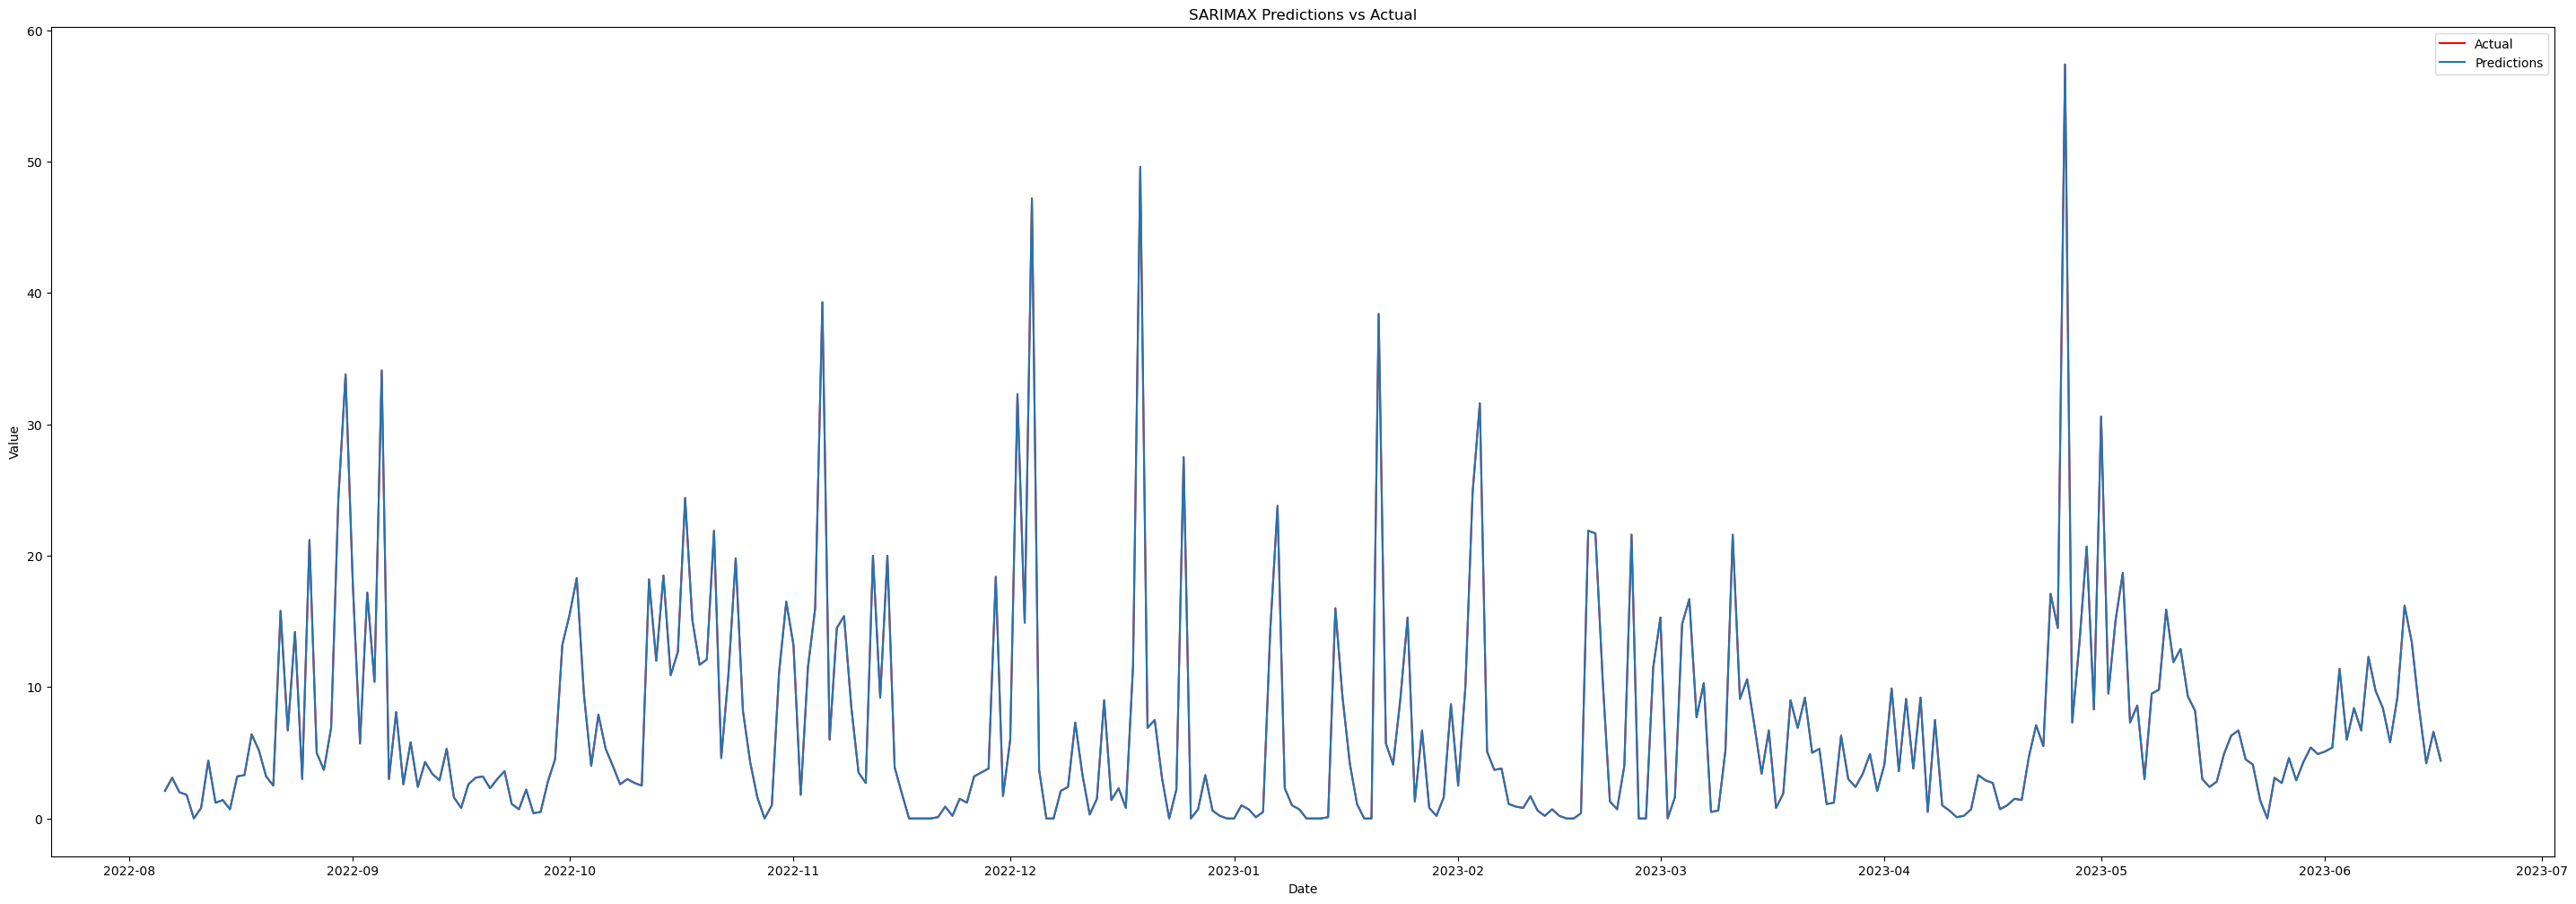

In [49]:
import matplotlib.pyplot as plt

# Increase the size of the figure
plt.figure(figsize=(36, 12))  # Adjust the width and height as needed

# Plot actual and predicted values
plt.plot(test_endog.index, test_endog, label='Actual' , color='red')
plt.plot(test_endog.index, predictions, label='Predictions')


# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMAX Predictions vs Actual')

# Add legend
plt.legend()

# Show the plot
plt.show()

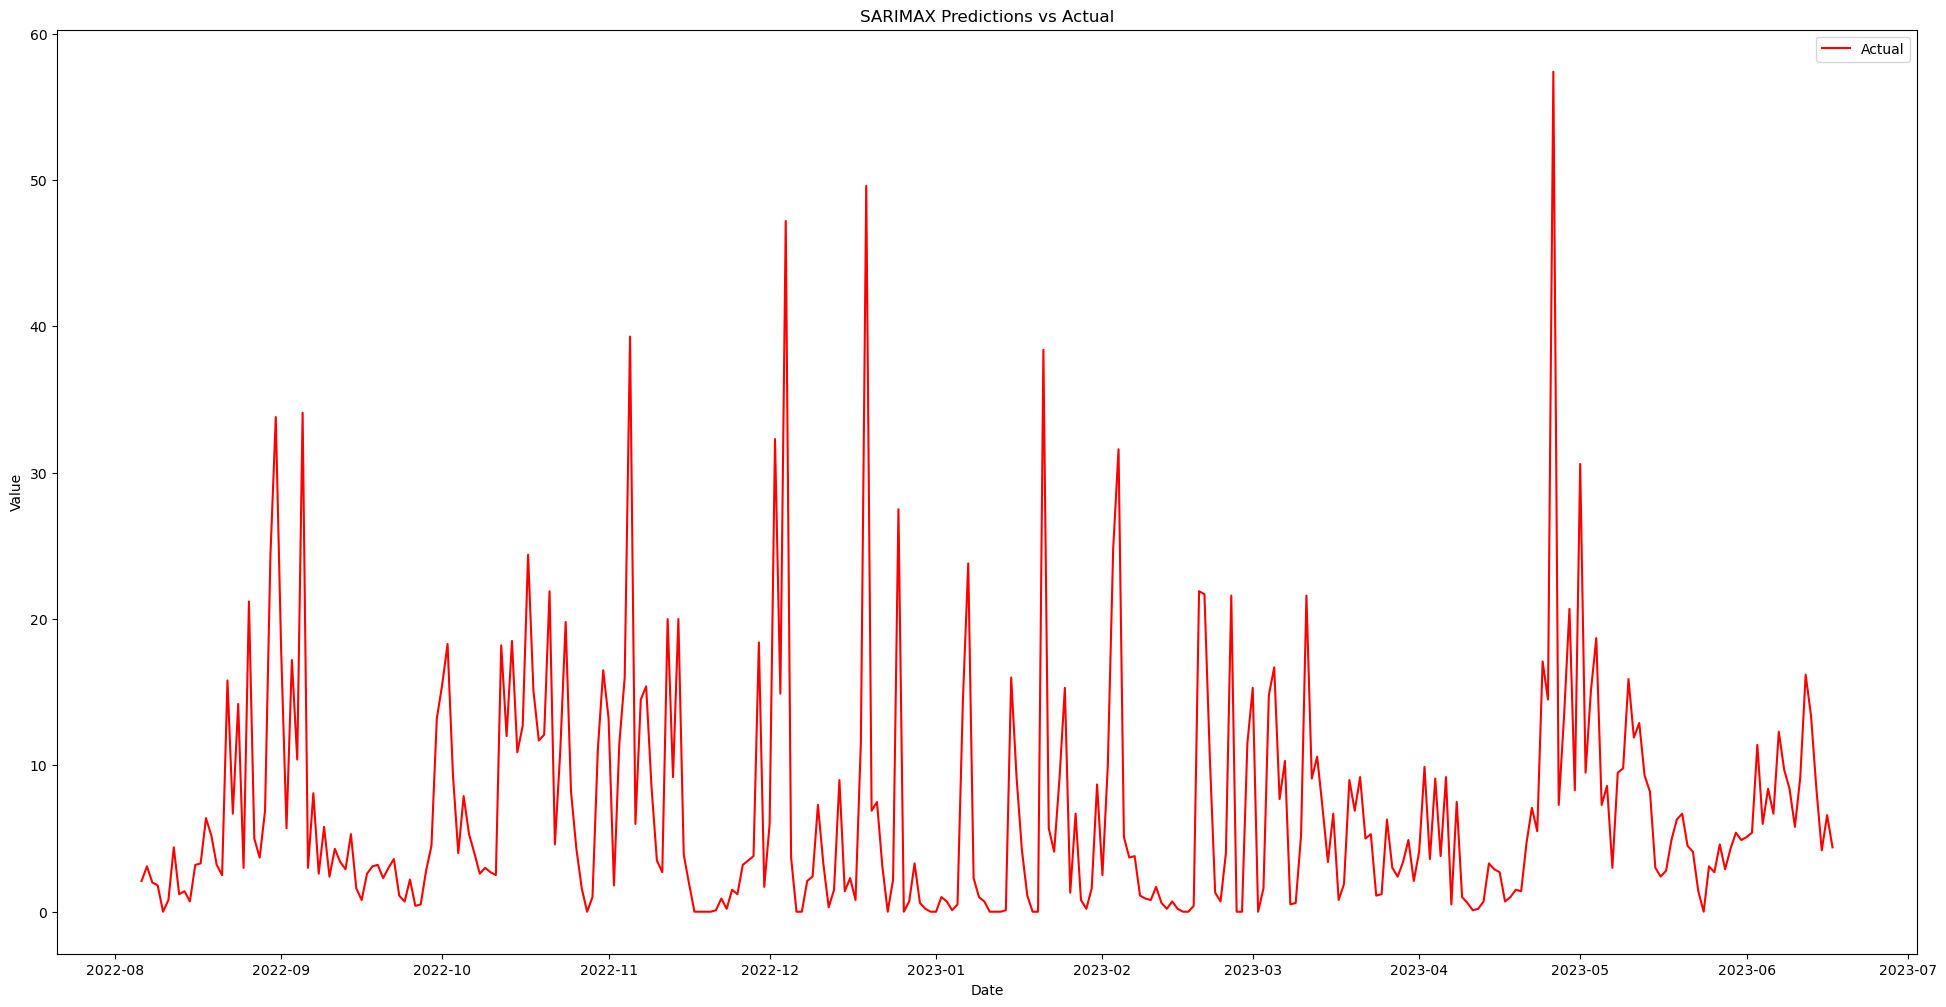

In [50]:
import matplotlib.pyplot as plt

# Increase the size of the figure
plt.figure(figsize=(24, 12))  # Adjust the width and height as needed

# Plot actual and predicted values
plt.plot(test_endog.index, test_endog, label='Actual' , color='red')


# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMAX Predictions vs Actual')

# Add legend
plt.legend()

# Show the plot
plt.show()

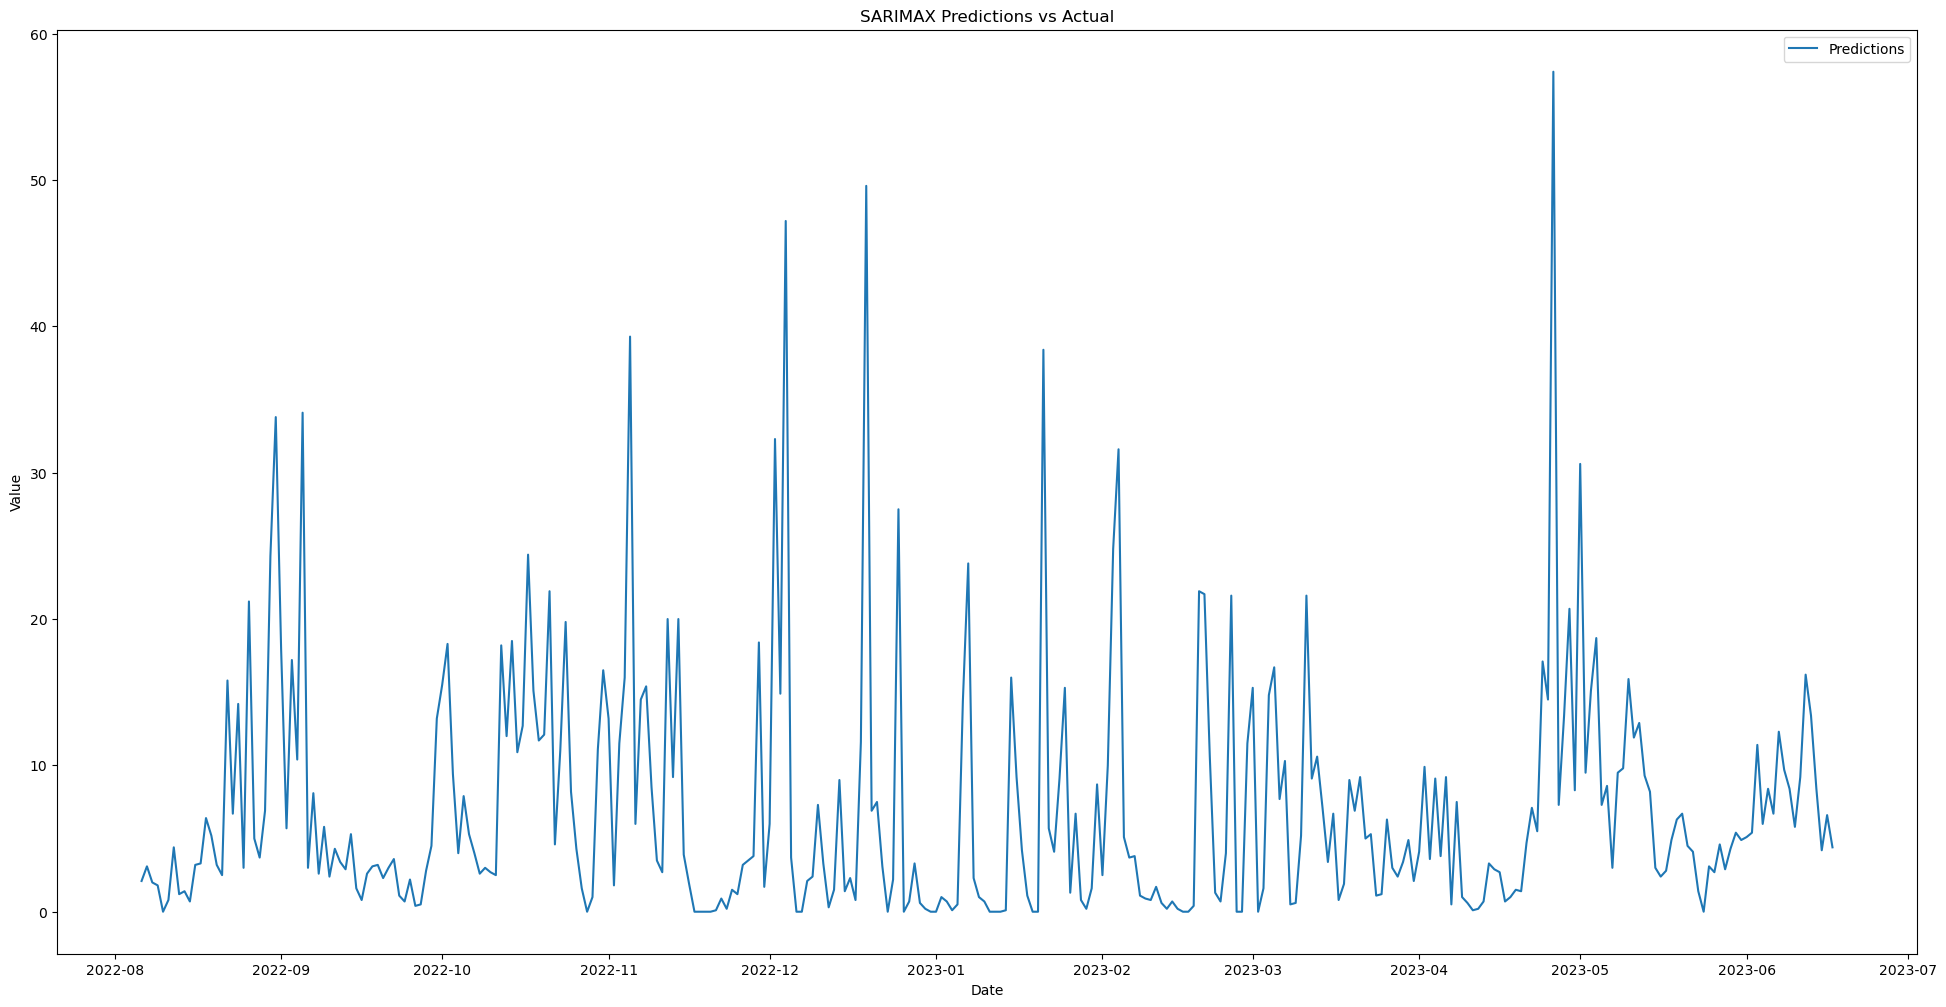

In [51]:
import matplotlib.pyplot as plt

# Increase the size of the figure
plt.figure(figsize=(24, 12))  # Adjust the width and height as needed

# Plot actual and predicted values
plt.plot(test_endog.index, predictions, label='Predictions')


# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMAX Predictions vs Actual')

# Add legend
plt.legend()

# Show the plot
plt.show()